In [ ]:
# this is the cleaned version of the notebook

In [224]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
# lets start with investigating in the survey 
idealhotel = pd.read_csv('idealhotelsurvey.csv')
pd.set_option('display.max_columns', None)
idealhotel.head()

,#,Hotel,Hostel,Vacation apartment without service (such as Airbnb),Vacation apartment with service,"Boutique hotel (only up to 100 guests, more individual service)","Bed & breakfast (often private family homes, small number of rooms only)",Camping,Villa/ Chalet,Boats,Resort,Do you care about the star rating a hotel has?,What is your preferred star rating for a hotel?,Price,Quality,Brand,Location,Services offered,Size,All- inclusive,Breakfast,Breakfast and lunch,Breakfast and dinner,I prefer cooking by myself,None (meaning on holidays you prefer eating outside),Who would you like to meet during your stay at the accommodation?,A private room/ apartment is very important for me.,"How important is it for you to follow your hobby even on holidays? (e.g. yoga, fitness, learning a language, cooking)",Would you appreciate when your hobby would get offered in the hotel?,Did you ever take usage of offered trips by the accommodation?,Local wine testing,Local food tour,Trips to the surrounded nature,City/ Sightseeing tour,"Events (dinner, party, networking etc.)","Sport classes (yoga, fitness, running etc.)",None,Spa/ Massages,Car rental/ Shuttle services,Fitness rooms,Co- working spaces,Membership advantages,"Game rooms (billiard, table tennis etc.)",Any additional adventures/ services you would appreciate?,Sustainability is important for me,Vegan,Vegetarian,Intermittent Fasting,Gluten free,Lactose free,Histamine intolerance,Specific allergies,Paleo,Other,None.1,Consuming locally is very important for me,What's your age range?,What is your gender?,In which country do you live?,Which country is your favourite holiday destination?,Whats your family status?,What's your current employment status?,...and your yearly income?,Whats the highest level of education you've completed?,Other.1,If you want to be updated on the status of the project *enter your email address* and I'll let you know how the ideal hotel looks 😉,Start Date (UTC),Submit Date (UTC),Network ID,Tags
0,fuhno7rvhc33x1sfuhnll3his1cbc0n8,NaN,NaN,Vacation apartment without service (such as Ai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,Price,NaN,NaN,Location,NaN,NaN,NaN,NaN,NaN,NaN,I prefer cooking by myself,NaN,People to hangout,Yes,3,Yes,No,NaN,Local food tour,NaN,City/ Sightseeing tour,"Events (dinner, party, networking etc.)","Sport classes (yoga, fitness, running etc.)",NaN,Spa/ Massages,NaN,Fitness rooms,Co- working spaces,NaN,NaN,Early check-in! Or at least they can keep my b...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2,25 - 34,Female,Spain,Thailand,In a relationship without children,Employed full-time,"$25,000 - $49,999",Masters / Graduate Degree,NaN,leidy.linares@ironhack.com,2022-12-05 07:26:07,2022-12-05 07:33:11,53dcd6f998,NaN
1,ad802v3vtc1czwwad802vfn0e14nbwoc,Hotel,NaN,Vacation apartment without service (such as Ai...,NaN,NaN,"Bed & breakfast (often private family homes, s...",Camping,Villa/ Chalet,NaN,Resort,1,4,Price,NaN,NaN,Location,NaN,NaN,NaN,Breakfast,NaN,NaN,NaN,NaN,I don't mind,Yes,4,Yes,Yes,Local wine testing,Local food tour,Trips to the surrounded nature,City/ Sightseeing tour,NaN,NaN,NaN,Spa/ Massages,Car rental/ Shuttle services,Fitness rooms,NaN,NaN,NaN,nope! all marked before,4,NaN,NaN,NaN,NaN,Lactose free,NaN,NaN,NaN,NaN,NaN,4,19 - 24,Female,Spain,Andorra,In a relationship without children,Employed part-time,"$9,999 or less",Some College / University,NaN,mireia.prat@ironhack.com,2022-12-05 07:11:20,2022-12-05 07:16:07,1855abfb6f,NaN
2,zocpm5sh673s45xnzoc28vu5a4561p5v,NaN,NaN,NaN,NaN,"Boutique hotel (only up to 100 guests, more in...",NaN,NaN,NaN,NaN,NaN,1,5,NaN,NaN,NaN,NaN,Services offered,NaN,NaN,NaN,Breakfast and lunch,NaN,NaN,NaN,I don't mind,Yes,5,Yes,Yes,NaN,NaN,NaN,NaN,NaN,"Sport classes (yoga, fitness, running etc.)",NaN,Spa/ Massages,Car rental/ Shuttle services,NaN,NaN,Membership advantages,NaN,Mountain guide,5,NaN,Vegetarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,45 - 54,Female,Germany,Italy,In a relationship without children,Employed full-time,"$25,000

In [226]:
# renaming some column names 
idealhotel.rename(columns = {'Vacation apartment without service (such as Airbnb)':'Vacation_apartm_without_service', 'Vacation apartment with service':'Vacation_apartm_with_service', "Boutique hotel (only up to 100 guests, more individual service)":"Boutique_hotel"}, inplace = True)
idealhotel.rename(columns = {"Bed & breakfast (often private family homes, small number of rooms only)":"Bed_breakfast","Do you care about the star rating a hotel has?":"Importance_star_rating","What is your preferred star rating for a hotel?":"star_rating"}, inplace = True)
idealhotel.rename(columns = {"Who would you like to meet during your stay at the accommodation?":"meet_during_stay", "How important is it for you to follow your hobby even on holidays? (e.g. yoga, fitness, learning a language, cooking)":"importance_hobbies_on_holiday"}, inplace = True)
idealhotel.rename(columns = {"Would you appreciate when your hobby would get offered in the hotel?":"Hobby_offered","Did you ever take usage of offered trips by the accommodation?":"usage_of_trips_from_accom", "Events (dinner, party, networking etc.)": "Events","Sport classes (yoga, fitness, running etc.)":"Sport_classes"}, inplace = True)
idealhotel.rename(columns = {"Game rooms (billiard, table tennis etc.)":"Game_rooms","Consuming locally is very important for me":"Importance_consuming_locally","What's your age range?":"Age_range", 'Villa/ Chalet':'Villa_Chalet', "Sustainability is important for me":"Sustainability"}, inplace = True)
idealhotel.rename(columns = {"What is your gender?":"Gender", "In which country do you live?":"Country_of_residence", "Which country is your favourite holiday destination?":"Favorite_holiday_destination", "Whats your family status?":"Family_status"}, inplace = True)
idealhotel.rename(columns = {"What's your current employment status?":"Employment_status","...and your yearly income?":"Yearly_income", "Whats the highest level of education you've completed?":"Highest_education", "None (meaning on holidays you prefer eating outside)":"No", "If you want to be updated on the status of the project *enter your email address* and I'll let you know how the ideal hotel looks 😉":"Status"}, inplace = True)

In [227]:
# dropping the unnecessary columns
idealhotel.drop('#', axis=1, inplace=True)
idealhotel.drop('Other.1', axis=1, inplace=True)
idealhotel.drop('Status', axis=1, inplace=True)
idealhotel.drop('Start Date (UTC)', axis=1, inplace=True)
idealhotel.drop('Submit Date (UTC)', axis=1, inplace=True)
idealhotel.drop('Network ID', axis=1, inplace=True)
idealhotel.drop('Tags', axis=1, inplace=True)

In [228]:
# replacing nan values with not chosen as this where the options people didn´t chose while doing the survey
idealhotel.replace(to_replace=np.nan, value='Not chosen')

,Hotel,Hostel,Vacation_apartm_without_service,Vacation_apartm_with_service,Boutique_hotel,Bed_breakfast,Camping,Villa_Chalet,Boats,Resort,Importance_star_rating,star_rating,Price,Quality,Brand,Location,Services offered,Size,All- inclusive,Breakfast,Breakfast and lunch,Breakfast and dinner,I prefer cooking by myself,No,meet_during_stay,A private room/ apartment is very important for me.,importance_hobbies_on_holiday,Would you appreciate when your hobby would get offered in the hotel?,usage_of_trips_from_accom,Local wine testing,Local food tour,Trips to the surrounded nature,City/ Sightseeing tour,Events,Sport_classes,None,Spa/ Massages,Car rental/ Shuttle services,Fitness rooms,Co- working spaces,Membership advantages,Game_rooms,Any additional adventures/ services you would appreciate?,Sustainability,Vegan,Vegetarian,Intermittent Fasting,Gluten free,Lactose free,Histamine intolerance,Specific allergies,Paleo,Other,None.1,Importance_consuming_locally,Age_range,Gender,Country_of_residence,Favorite_holiday_destination,Family_status,Employment_status,Yearly_income,Highest_education
0,Not chosen,Not chosen,Vacation apartment without service (such as Ai...,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,1,4,Price,Not chosen,Not chosen,Location,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,I prefer cooking by myself,Not chosen,People to hangout,Yes,3,Yes,No,Not chosen,Local food tour,Not chosen,City/ Sightseeing tour,"Events (dinner, party, networking etc.)","Sport classes (yoga, fitness, running etc.)",Not chosen,Spa/ Massages,Not chosen,Fitness rooms,Co- working spaces,Not chosen,Not chosen,Early check-in! Or at least they can keep my b...,1,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,None,2,25 - 34,Female,Spain,Thailand,In a relationship without children,Employed full-time,"$25,000 - $49,999",Masters / Graduate Degree
1,Hotel,Not chosen,Vacation apartment without service (such as Ai...,Not chosen,Not chosen,"Bed & breakfast (often private family homes, s...",Camping,Villa/ Chalet,Not chosen,Resort,1,4,Price,Not chosen,Not chosen,Location,Not chosen,Not chosen,Not chosen,Breakfast,Not chosen,Not chosen,Not chosen,Not chosen,I don't mind,Yes,4,Yes,Yes,Local wine testing,Local food tour,Trips to the surrounded nature,City/ Sightseeing tour,Not chosen,Not chosen,Not chosen,Spa/ Massages,Car rental/ Shuttle services,Fitness rooms,Not chosen,Not chosen,Not chosen,nope! all marked before,4,Not chosen,Not chosen,Not chosen,Not chosen,Lactose free,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,4,19 - 24,Female,Spain,Andorra,In a relationship without children,Employed part-time,"$9,999 or less",Some College / University
2,Not chosen,Not chosen,Not chosen,Not chosen,"Boutique hotel (only up to 100 guests, more in...",Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,1,5,Not chosen,Not chosen,Not chosen,Not chosen,Services offered,Not chosen,Not chosen,Not chosen,Breakfast and lunch,Not chosen,Not chosen,Not chosen,I don't mind,Yes,5,Yes,Yes,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,"Sport classes (yoga, fitness, running etc.)",Not chosen,Spa/ Massages,Car rental/ Shuttle services,Not chosen,Not chosen,Membership advantages,Not chosen,Mountain guide,5,Not chosen,Vegetarian,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,5,45 - 54,Female,Germany,Italy,In a relationship without children,Employed full-time,"$25,000 - $49,999",High School
3,Not chosen,Not chosen,Vacation apartment without service (such as Ai...,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,1,5,Not chosen,Not chosen,Not chosen,Location,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,I prefer cooking by myself,Not chosen,Families/ Couples,Yes,4,Yes,No,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,Not chosen,None,Not chosen,Car rental/ Shuttle services,Fitness

In [229]:
idealhotel.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Hotel                                                                  20 non-null     object 
 1   Hostel                                                                 6 non-null      object 
 2   Vacation_apartm_without_service                                        22 non-null     object 
 3   Vacation_apartm_with_service                                           6 non-null      object 
 4   Boutique_hotel                                                         8 non-null      object 
 5   Bed_breakfast                                                          5 non-null      object 
 6   Camping                                                                7 non-null      objec

In [230]:
hotel = idealhotel.replace({'Any additional adventures/ services you would appreciate?' : { 'Airport pick up' : "airport shuttle", 'Shuttle service to and from the airport' : "airport shuttle" }})

In [231]:
# 11 people couldn´t chose between hotels and holiday apartments
hotel.groupby(["Hotel", "Vacation_apartm_without_service"]).size()

Hotel  Vacation_apartm_without_service                    
Hotel  Vacation apartment without service (such as Airbnb)    11
dtype: int64

In [232]:
# hotel.groupby(["Price", "Quality "]).size() -> 9
hotel.groupby(["Price", "Location"]).size() 

Price  Location
Price  Location    12
dtype: int64

In [233]:
finalhotel = hotel.replace(to_replace=np.nan, value='Not chosen').replace({'Any additional adventures/ services you would appreciate?' : { 'Airport pick up' : "airport shuttle", 'Shuttle service to and from the airport' : "airport shuttle", "nope! all marked before":"No", "Nop":"No","None":"No","Na":"No"}})

In [234]:
# now merging the tables as this was one question in the survey 

In [235]:
# the survey asked for the prefered accommodation and the new columns merges all the possible answers
finalhotel["Prefered_accommodation"]= finalhotel["Hotel"]+"-"+finalhotel["Hostel"]+"-"+finalhotel["Vacation_apartm_without_service"]+"-"+finalhotel["Vacation_apartm_with_service"]+"-"+finalhotel["Boutique_hotel"]+"-"+finalhotel["Bed_breakfast"]+"-"+finalhotel["Camping"]+"-"+finalhotel["Villa_Chalet"]+"-"+finalhotel["Boats"]
finalhotel["Prefered_accommodation"]=finalhotel["Prefered_accommodation"].str.replace("Not chosen-","").str.split("-")
finalhotel = finalhotel.drop(columns= ["Hotel", "Hostel",'Vacation_apartm_without_service', 'Vacation_apartm_with_service', "Boutique_hotel", 'Bed_breakfast', 'Villa_Chalet',"Camping"])
finalhotel = finalhotel.drop(columns=finalhotel.columns[:2])

In [236]:
# the survey asked what could influence the decision of an accommodation and the new column merges all the possible answers people could tick
finalhotel["Influence_decision"]= finalhotel["Price"]+"-"+finalhotel["Quality "]+"-"+finalhotel["Brand"]+"-"+finalhotel["Location"]+"-"+finalhotel["Size"]+"-"+finalhotel["Services offered "]
finalhotel["Influence_decision"]=finalhotel["Influence_decision"].str.replace("Not chosen","").str.split("-")
finalhotel = finalhotel.drop(columns= ["Price", "Quality ","Brand","Location", "Services offered ", "Size"])

In [237]:
# new column merges all the possible answers for the question what kind of offered meal people prefer in the accommodation
finalhotel["Meal"]= finalhotel["All- inclusive"]+"-"+finalhotel["Breakfast"]+"-"+finalhotel["Breakfast and lunch"]+"-"+finalhotel["Breakfast and dinner "]+"-"+finalhotel["I prefer cooking by myself"]
finalhotel["Meal"]=finalhotel["Meal"].str.replace("Not chosen","").str.split("-")
finalhotel = finalhotel.drop(columns=["All- inclusive", "Breakfast","Breakfast and lunch","Breakfast and dinner ", "I prefer cooking by myself", "No"])

In [238]:
# new column merges all the trips people would enjoy or already enjoyed during their stay, offered by the accommodation
finalhotel["Trips"]= finalhotel["Local wine testing"]+"-"+finalhotel["Local food tour"]+"-"+finalhotel["Trips to the surrounded nature"]+"-"+finalhotel["City/ Sightseeing tour"]+"-"+finalhotel["Events"]+"-"+finalhotel["Sport_classes"]+"-"+finalhotel["Spa/ Massages"]+"-"+finalhotel["Car rental/ Shuttle services"]+"-"+finalhotel["Fitness rooms"]+"-"+finalhotel["Co- working spaces"]+"-"+finalhotel["Membership advantages"]+"-"+finalhotel["Game_rooms"]
finalhotel["Trips"]=finalhotel["Trips"].str.replace("Not chosen","").str.split("-")
finalhotel = finalhotel.drop(columns=["Local wine testing", "Local food tour","Trips to the surrounded nature","City/ Sightseeing tour", "Events", "Sport_classes","Spa/ Massages", "Car rental/ Shuttle services","Fitness rooms", "Co- working spaces", "Membership advantages", "Game_rooms"])

In [239]:
# new columns merges possible answers people could chose by asking if they are following a specific diet 
finalhotel["Diet"]= finalhotel["Vegan"]+"-"+finalhotel["Vegetarian"]+"-"+finalhotel["Intermittent Fasting"]+"-"+finalhotel["Gluten free"]+"-"+finalhotel["Lactose free "]+"-"+finalhotel["Histamine intolerance"]+"-"+finalhotel["Specific allergies"]+"-"+finalhotel["Paleo"]+"-"+finalhotel["Other"]+"-"+finalhotel["None.1"]
finalhotel["Diet"]=finalhotel["Diet"].str.replace("Not chosen","").str.split("-")
finalhotel = finalhotel.drop(columns=["Vegan", "Vegetarian","Intermittent Fasting", "Gluten free", "Lactose free ","Histamine intolerance", "Specific allergies","Paleo", "Other", "None.1"])

In [240]:
finalhotel.head()

,Importance_star_rating,star_rating,meet_during_stay,A private room/ apartment is very important for me.,importance_hobbies_on_holiday,Would you appreciate when your hobby would get offered in the hotel?,usage_of_trips_from_accom,None,Any additional adventures/ services you would appreciate?,Sustainability,Importance_consuming_locally,Age_range,Gender,Country_of_residence,Favorite_holiday_destination,Family_status,Employment_status,Yearly_income,Highest_education,Prefered_accommodation,Influence_decision,Meal,Trips,Diet
0,1,4,People to hangout,Yes,3,Yes,No,Not chosen,Early check-in! Or at least they can keep my b...,1,2,25 - 34,Female,Spain,Thailand,In a relationship without children,Employed full-time,"$25,000 - $49,999",Masters / Graduate Degree,[Vacation apartment without service (such as A...,"[Price, , , Location, , ]","[, , , , I prefer cooking by myself]","[, Local food tour, , City/ Sightseeing tour, ...","[, , , , , , , , , None]"
1,1,4,I don't mind,Yes,4,Yes,Yes,Not chosen,No,4,4,19 - 24,Female,Spain,Andorra,In a relationship without children,Employed part-time,"$9,999 or less",Some College / University,"[Hotel, Vacation apartment without service (su...","[Price, , , Location, , ]","[, Breakfast, , , ]","[Local wine testing, Local food tour, Trips to...","[, , , , Lactose free , , , , , ]"
2,1,5,I don't mind,Yes,5,Yes,Yes,Not chosen,Mountain guide,5,5,45 - 54,Female,Germany,Italy,In a relationship without children,Employed full-time,"$25,000 - $49,999",High School,"[Boutique hotel (only up to 100 guests, more i...","[, , , , , Services offered ]","[, , Breakfast and lunch, , ]","[, , , , , Sport classes (yoga, fitness, runni...","[, Vegetarian, , , , , , , , ]"
3,1,5,Families/ Couples,Yes,4,Yes,No,None,Cleaning services,3,2,19 - 24,Female,Spain,Spain,In a relationship without children,Student,"$50,000 - $74,999",Masters / Graduate Degree,[Vacation apartment without service (such as A...,"[, , , Location, , ]","[, , , , I prefer cooking by myself]","[, , , , , , , Car rental/ Shuttle services, F...","[, , , Gluten free, Lactose free , , , , , ]"
4,1,4,People to hangout,Yes,5,Yes,Yes,Not chosen,Allow pets.,5,4,25 - 34,Female,Netherlands,Mexico,In a relationship without children,Employed full-time,"$25,000 - $49,999",Masters / Graduate Degree,"[Hotel, Camping, Villa/ Chalet, Not chosen]","[Price, Quality , , , , ]","[All, inclusive, Breakfast, , , ]","[, , , City/ Sightseeing tour, Events (dinner,...","[, , , , , , , , , None]"


In [241]:
import scipy.stats as stats

In [242]:
# First Hypothesis test 

# lets see if the rating for the importance of consuming locally and for sustainability is similar
# H0: avg_sample1 = avg_sample2 vs H1: avg_sample1 != avg_sample2 

sample1 = finalhotel['Importance_consuming_locally'].sample(30)
sample2 = finalhotel['Sustainability'].sample(30)
stats.ttest_ind(a=sample1, b=sample2, equal_var=True)

# p value is high (54%), that means the average of sample 1 is equal to the average of sample 2, that could mean
# that people gave similar ratings to both questions which lets us assume if people are keen on consuming locally
# they are also keen on acting sustainable 

Ttest_indResult(statistic=-0.6084511204340459, pvalue=0.5452638991579564)

In [322]:
# let´s check if our asked group is keen in general on consuming locally and acting sustainable 
finalhotel['Importance_consuming_locally'].mean()

3.7837837837837838

In [323]:
finalhotel['Sustainability'].mean()

# we can see that the Hypothesis test was right as the mean is the same
# also out of 5 people answered with a mean of 3.78 which let us assume that sustainability and consuming locally
# is quite important for the asked group 

3.7837837837837838

In [343]:
# Second Hypothesis test 
# Lets check if the rating for the star rating and the importance of following hobbies on holiday is dependent.
#H0: avg1 = avg2 vs H1: avg1 != avg2 
sample_a = finalhotel['importance_hobbies_on_holiday'].sample(30)
sample_b = finalhotel['star_rating'].sample(30)


In [344]:
stats.ttest_ind(a=sample_a, b=sample_b, equal_var=True)
# p value is very low, we need to reject the H0 
# that means there is no connection between a star rating and the importance of following the hobby on holiday 

Ttest_indResult(statistic=-3.9226753247586035, pvalue=0.00023439454749843295)

In [450]:
# lets have a look in the second data source, the randomly chosen hotels and apartments from booking.com
bookingcom = pd.read_excel('Bookingdates.xlsx')
pd.set_option('display.max_columns', None)
bookingcom.head()

,Hotellink,AccomType,Name,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Meals,additional_services,Rate_per_night_in_euros,additional_marketing,size_in_rooms,post code,street name,city,country
0,https://www.booking.com/hotel/pt/chiado-apartm...,Apartment,Lisbon Rentals Chiado,9.5,9.9,9.7,652.0,0.40,4.0,None,airport shuttle,308.0,Sustainability,NaN,1200-271,Rua da Misericordia 67,Lisbon,Portugal
1,https://www.booking.com/hotel/pt/alfama-28-lis...,Apartment,ON/SET Alfama,9.9,9.7,9.9,560.0,1.00,4.0,None,airport shuttle,162.0,Sustainability,5.0,1100-608,Calçadinha do Tijolo 28,Lisbon,Portugal
2,https://www.booking.com/hotel/pt/blue-liberdad...,Hotel,Blue Liberdade Hotel,9.6,9.9,9.5,1192.0,0.20,3.0,Breakfast,airport shuttle,262.0,Sustainability,39.0,1250-096,Praça dos Restauradores 78,Lisbon,Portugal
3,https://www.booking.com/hotel/pt/star-inn-lisb...,Hotel,Star Inn Lisbon Airport,9.5,9.5,8.8,10081.0,6.40,3.0,Breakfast,"airport shuttle, room service, restaurant",125.0,Sustainability,173.0,1749-125,Aeroporto Internacional de Lisboa,Lisbon,Portugal
4,https://www.booking.com/hotel/pt/montebelo-lis...,Apartment,Montebelo LX,9.6,9.9,9.8,624.0,0.35,4.0,None,airport shuttle,258.0,Sustainability,NaN,1100-421,Rua da Prata 156,Lisbon,Portugal


In [451]:
bookingcom.drop('Hotellink', axis=1, inplace=True)
bookingcom.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccomType                39 non-null     object 
 1   Name                     39 non-null     object 
 2   overall_rating           32 non-null     float64
 3   rating_location          32 non-null     float64
 4   rating_facilities        32 non-null     float64
 5   amount_ratings           32 non-null     float64
 6   DistanceCity_inkm        32 non-null     float64
 7   Stars                    32 non-null     float64
 8   Meals                    32 non-null     object 
 9   additional_services      32 non-null     object 
 10  Rate_per_night_in_euros  32 non-null     float64
 11  additional_marketing     32 non-null     object 
 12  size_in_rooms            26 non-null     float64
 13  post code                39 non-null     object 
 14  street name              38 

In [452]:
# replacing nan values that only occur in the size column
bookingcom.replace(to_replace=np.nan, value='-').head()

,AccomType,Name,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Meals,additional_services,Rate_per_night_in_euros,additional_marketing,size_in_rooms,post code,street name,city,country
0,Apartment,Lisbon Rentals Chiado,9.5,9.9,9.7,652.0,0.4,4.0,None,airport shuttle,308.0,Sustainability,-,1200-271,Rua da Misericordia 67,Lisbon,Portugal
1,Apartment,ON/SET Alfama,9.9,9.7,9.9,560.0,1.0,4.0,None,airport shuttle,162.0,Sustainability,5.0,1100-608,Calçadinha do Tijolo 28,Lisbon,Portugal
2,Hotel,Blue Liberdade Hotel,9.6,9.9,9.5,1192.0,0.2,3.0,Breakfast,airport shuttle,262.0,Sustainability,39.0,1250-096,Praça dos Restauradores 78,Lisbon,Portugal
3,Hotel,Star Inn Lisbon Airport,9.5,9.5,8.8,10081.0,6.4,3.0,Breakfast,"airport shuttle, room service, restaurant",125.0,Sustainability,173.0,1749-125,Aeroporto Internacional de Lisboa,Lisbon,Portugal
4,Apartment,Montebelo LX,9.6,9.9,9.8,624.0,0.35,4.0,None,airport shuttle,258.0,Sustainability,-,1100-421,Rua da Prata 156,Lisbon,Portugal


In [461]:
mean = bookingcom.drop([bookingcom.index[23]])
mean.groupby('AccomType').mean()
# dropping the outlier (882€ a night) as outliers can falsify the outcome
# the avg rate per night for hotels from our sample is 251€

,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Rate_per_night_in_euros,size_in_rooms
AccomType,,,,,,,,
Apartment,9.116667,9.466667,9.258333,658.75,1.679167,3.500000,204.916667,33.714286
Bars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hotel,9.094737,9.310526,9.142105,2278.00,2.352632,4.157895,251.315789,105.833333
Sightseeing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [454]:
bookingcom['AccomType'].value_counts()
#bookingcom['overall_rating'].value_counts()

Hotel          20
Apartment      12
Sightseeing     6
Bars            1
Name: AccomType, dtype: int64

In [455]:
# Third Hypothesis test 

# lets check if the mean rating for hotels is higher then for apartments
# as we have most of the raitings being above 9 we assume the mean is > 9
#H0: \mu_1 >= 9, H1 \mu_1 =< 9
# alpha = 0.05 
sample5 = bookingcom[bookingcom['AccomType']=="Hotel"]['overall_rating'].sample(19)
st.ttest_1samp(sample5,9)
# p value is 35% which is above the significance level, we cannot reject the H0 which means the mean rating of
# hotels is nine or above 9

Ttest_1sampResult(statistic=0.94401378668955, pvalue=0.3576624292713708)

In [372]:
# Fourth Hypothesis test 

# lets check the ratings from the apartments 
#H0: \mu_1 >= 9, H1 \mu_1 =< 9
# alpha = 0.05
sample6 = bookingcom[bookingcom['AccomType']=="Apartment"]['overall_rating'].sample(12)
st.ttest_1samp(sample6,9)
# p value is 34% which means we cannot reject the H0
# mean ratings of apartments is 9 or above 

Ttest_1sampResult(statistic=0.9944801786300628, pvalue=0.3413620771630812)

In [373]:
# Testing Confidence Intervals 
st.t.interval (alpha = 0.95 , df = len(sample5)-1, loc = sample5.mean(), scale = st.sem (sample5))

/var/folders/rp/6l79_pc51ds351s_y91pq2vh0000gn/T/ipykernel_36225/1560564030.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval (alpha = 0.95 , df = len(sample5)-1, loc = sample5.mean(), scale = st.sem (sample5))


(8.930468081668991, 9.195847707804692)

In [374]:
st.t.interval (alpha = 0.95 , df = len(sample6)-1, loc = sample6.mean(), scale = st.sem (sample6))
# the confidence interval of sample 6 which is the apartment rating is more instable as the confidence interval
# is wider that means the ratings are brider distrubuted from the means then for hotels 

/var/folders/rp/6l79_pc51ds351s_y91pq2vh0000gn/T/ipykernel_36225/385330248.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval (alpha = 0.95 , df = len(sample6)-1, loc = sample6.mean(), scale = st.sem (sample6))


(8.858459808925765, 9.374873524407569)

In [462]:
bookingcom[bookingcom['AccomType']=="Apartment"]['overall_rating'].mean()

9.116666666666667

In [463]:
bookingcom[bookingcom['AccomType']=="Hotel"]['overall_rating'].mean()

9.080000000000002

In [375]:
# Fifth Hypothesis test 
# H0: avg1 = avg2 vs H1: avg1 != avg2 
# lets test if the rating of facilities differs for hotels and apartments
stats.ttest_ind(bookingcom['rating_facilities'][bookingcom['AccomType'] == 'Hotel'],
                bookingcom['rating_facilities'][bookingcom['AccomType'] == 'Apartment'])
# p value is 24% that means there is a statistically difference in the mean rating for facilities for hotels and apartments

Ttest_indResult(statistic=-1.1771496477944372, pvalue=0.248390982272702)

In [376]:
# lets check their mean ratings and confidence intervals 
bookingcom[bookingcom['AccomType']=="Apartment"]['rating_facilities'].mean()

9.258333333333335

In [377]:
bookingcom[bookingcom['AccomType']=="Hotel"]['rating_facilities'].mean()
# the mean rating of facilities for apartments is higher 

9.124999999999998

In [378]:
# lets check their confidence intervals 
sample7 = bookingcom[bookingcom['AccomType']=="Apartment"]['rating_facilities'].sample(12)
st.t.interval (alpha = 0.95 , df = len(sample7)-1, loc = sample7.mean(), scale = st.sem (sample7))

/var/folders/rp/6l79_pc51ds351s_y91pq2vh0000gn/T/ipykernel_36225/3756823208.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval (alpha = 0.95 , df = len(sample7)-1, loc = sample7.mean(), scale = st.sem (sample7))


(9.000660022648535, 9.516006644018134)

In [379]:
sample8 = bookingcom[bookingcom['AccomType']=="Hotel"]['rating_facilities'].sample(20)
st.t.interval (alpha = 0.95 , df = len(sample8)-1, loc = sample8.mean(), scale = st.sem (sample8))
# the mean for the rating of facilities is higher for apartments but also the confidence interval is brider 
# that means there is more deviation from the mean 
# that means there could be more ratings above but also more ratings way below the mean
# the mean for hotels is more stable 

/var/folders/rp/6l79_pc51ds351s_y91pq2vh0000gn/T/ipykernel_36225/2297983603.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval (alpha = 0.95 , df = len(sample8)-1, loc = sample8.mean(), scale = st.sem (sample8))


(9.013547180226372, 9.236452819773628)

In [426]:
# we will need to means for some insights in the tableau analysis
bookingcom.mean()

/var/folders/rp/6l79_pc51ds351s_y91pq2vh0000gn/T/ipykernel_36225/1530830635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bookingcom.mean()


overall_rating                9.093750
rating_location               9.346875
rating_facilities             9.175000
amount_ratings             1604.625000
DistanceCity_inkm             2.085938
Stars                         3.937500
Rate_per_night_in_euros     253.625000
size_in_rooms                93.192308
dtype: float64

In [380]:
bookingcom.head(2)

,AccomType,Name,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Meals,additional_services,Rate_per_night_in_euros,additional_marketing,size_in_rooms
0,Apartment,Lisbon Rentals Chiado,9.5,9.9,9.7,652,0.4,4,None,airport shuttle,308,Sustainability,NaN
1,Apartment,ON/SET Alfama,9.9,9.7,9.9,560,1.0,4,None,airport shuttle,162,Sustainability,5.0


In [393]:
# lets check why facility ratings for apartments are higher then for hotels
# lets have a look at the comments
# insight3 = bookingcom.query("AccomType"=="Apartment",inplace=True)
insight1 = bookingcom.sort_values(by=['amount_ratings'], ascending=False)
insight1
# as the Upon Prime Residences have the highest amount of ratings lets have a look at their comments

,AccomType,Name,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Meals,additional_services,Rate_per_night_in_euros,additional_marketing,size_in_rooms
3,Hotel,Star Inn Lisbon Airport,9.5,9.5,8.8,10081,6.40,3,Breakfast,"airport shuttle, room service, restaurant",125,Sustainability,173.0
12,Hotel,Lux Lisboa Park,8.9,8.6,9.1,6101,2.30,4,Breakfast,"pool, fitness room, airport shuttle",307,Sustainability,95.0
8,Hotel,Portugal Boutique Hotel,9.7,9.7,9.4,3131,0.25,4,Breakfast,none,218,Sustainability,53.0
15,Apartment,Upon Prime Residences,8.9,8.8,9.0,2762,5.80,4,"Breakfast, room service","pool, fitness room, room service, restaurant",180,None,129.0
10,Hotel,H10 Duque de Loule,9.0,8.8,9.2,2700,1.50,4,Breakfast,restaurant,229,Sustainability,89.0
18,Hotel,BessaHotel Liberdade,9.0,9.8,9.2,2138,0.50,4,"Breakfast, room service","pool, airport shuttle, fitness room, room serv...",255,Sustainability,113.0
5,Hotel,Myriad by Sana Hotels,9.3,9.5,9.5,2026,7.90,5,Breakfast,"airport shuttle, Spa & Wellness; Pool",364,Sustainability,186.0
31,Hotel,The lift Boutique Hotel,8.8,9.7,8.7,1818,0.20,3,Breakfast,"airport shuttle, restaurant",181,Sustainability,27.0
9,Hotel,Epic Sana Lisboa,9.2,8.7,9.5,1815,2.00,5,Breakfast,"airport shuttle, pool, garden, spa & wellness,...",294,Sustainability,311.0
29,Hotel,Zurin Charm Hotel,9.1,8.3,9.2,1812,2.60,3,Breakfast,none,143,Sustainability,36.0


In [364]:
bookingcom.sort_values('amount_ratings', ascending=False).head()

,AccomType,Name,overall_rating,rating_location,rating_facilities,amount_ratings,DistanceCity_inkm,Stars,Meals,additional_services,Rate_per_night_in_euros,additional_marketing,size_in_rooms
3,Hotel,Star Inn Lisbon Airport,9.5,9.5,8.8,10081,6.40,3,Breakfast,"airport shuttle, room service, restaurant",125,Sustainability,173.0
12,Hotel,Lux Lisboa Park,8.9,8.6,9.1,6101,2.30,4,Breakfast,"pool, fitness room, airport shuttle",307,Sustainability,95.0
8,Hotel,Portugal Boutique Hotel,9.7,9.7,9.4,3131,0.25,4,Breakfast,none,218,Sustainability,53.0
15,Apartment,Upon Prime Residences,8.9,8.8,9.0,2762,5.80,4,"Breakfast, room service","pool, fitness room, room service, restaurant",180,None,129.0
10,Hotel,H10 Duque de Loule,9.0,8.8,9.2,2700,1.50,4,Breakfast,restaurant,229,Sustainability,89.0


In [469]:
from bs4 import BeautifulSoup
import requests

In [470]:
# this are the apartment that has the highest rankings so we specifically have a look into their reviews
# and afterwards we´ll look into all the reviews 
url = "https://www.booking.com/hotel/pt/upon-lisbon-residences.en-gb.html?aid=318615&label=%5B%E2%80%A6%5Dsrepoch%3D1670878939&sid=b8c3e47697d64eacb1ad6d4abefb9ee5&dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1671182139;srpvid=e588411c739000aa;type=total;ucfs=1&#tab-reviews"

response = requests.get(url)

soup = BeautifulSoup(response.content)

reviews = soup.find_all("li", attrs = {"class": "ebb6d69bfc"})

for review in reviews:
    print(review.text)

SumeeraUnited Kingdom“Really lovely place to stay. Spacious clean apartment, staff were very helpful and welcoming, near to a metro and a huge stadium and Mall!! Highly recommend!”Read more
VincenzoUnited Kingdom“very nice rooms, staff amazing, we found a little cake in the room because it was my birthday”Read more
JoshuaUnited Kingdom“Really great location close by to the airport and the city centre. The flexibility of the 'Apart-hotel' is just what I need when travelling. The facilities (breakfast, pool & gym) are good and make the stay more comfortable. The size of the rooms...”Read more
SSintijaLatvia“Excellent hotel. The best we have stayed. The staff is kind, helpful and always positive. The room is clean, beautiful, comfortable bed and a great gift for the child, and we were also welcomed with Pastel de nata! Great! Free fresh fruit is...”Read more
NicoleUnited Kingdom“Great rooms with a lot of space. We had the 2 bedroom apartment and this gave us a lot of space also nice view 

In [4]:
# looking at the reviews for apartments 
from bs4 import BeautifulSoup
import requests
import pprint
import re
import pyperclip
import time


urls = ["https://www.booking.com/hotel/pt/chiado-apartments.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=34713507_88537709_0_0_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;highlighted_blocks=34713507_88537709_0_0_0;hpos=1;matching_block_id=34713507_88537709_0_0_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=34713507_88537709_0_0_0__123400;srepoch=1670772758;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/alfama-28-lisbon-historical-amp-charming-apartments.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=483275203_190089945_2_0_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=2;highlighted_blocks=483275203_190089945_2_0_0;hpos=2;matching_block_id=483275203_190089945_2_0_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=483275203_190089945_2_0_0__64600;srepoch=1670772758;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/montebelo-lisbon-downtown-apartments-lisboa1.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=5&hapos=5&sr_order=bayesian_review_score&srpvid=d57b6d4a1c4000a1&srepoch=1670772758&all_sr_blocks=576745201_233988385_2_0_0&highlighted_blocks=576745201_233988385_2_0_0&matching_block_id=576745201_233988385_2_0_0&sr_pri_blocks=576745201_233988385_2_0_0__103200&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/dare-lisbon-house.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=350136801_158944986_0_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=32;highlighted_blocks=350136801_158944986_0_1_0;hpos=7;matching_block_id=350136801_158944986_0_1_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=350136801_158944986_0_1_0__109840;srepoch=1670775100;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/1869-principe-real.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=251804711_364059514_2_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=127;highlighted_blocks=251804711_364059514_2_1_0;hpos=2;matching_block_id=251804711_364059514_2_1_0;nflt=review_score%3D80;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=251804711_364059514_2_1_0__89600;srepoch=1670776729;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/garrett-48-apartments.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=82509102_329753357_0_0_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=140;highlighted_blocks=82509102_329753357_0_0_0;hpos=15;matching_block_id=82509102_329753357_0_0_0;nflt=review_score%3D80;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=82509102_329753357_0_0_0__63600;srepoch=1670776729;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/upon-lisbon-residences.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=18&hapos=143&sr_order=bayesian_review_score&nflt=review_score%3D80&srpvid=d57b6d4a1c4000a1&srepoch=1670776729&all_sr_blocks=217900301_97408276_2_2_0&highlighted_blocks=217900301_97408276_2_2_0&matching_block_id=217900301_97408276_2_2_0&sr_pri_blocks=217900301_97408276_2_2_0__71880&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/whome-panoramic-living-w-elevator-ac-garage-perfect-for-families-amp-business-tr.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=6&hapos=106&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670777854&all_sr_blocks=844576701_351371885_4_0_0&highlighted_blocks=844576701_351371885_4_0_0&matching_block_id=844576701_351371885_4_0_0&sr_pri_blocks=844576701_351371885_4_0_0__98401&tpi_r=2&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/industrial-lisbon-apartment.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=2&hapos=152&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670778271&all_sr_blocks=394157004_363650860_0_0_0&highlighted_blocks=394157004_363650860_0_0_0&matching_block_id=394157004_363650860_0_0_0&sr_pri_blocks=394157004_363650860_0_0_0__67600&tpi_r=2&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/gs-chiado-boutique-studios-amp-suites.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=19&hapos=169&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670778271&all_sr_blocks=168471207_89755420_0_0_0&highlighted_blocks=168471207_89755420_0_0_0&matching_block_id=168471207_89755420_0_0_0&sr_pri_blocks=168471207_89755420_0_0_0__46700&tpi_r=2&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/azulejos-concept-by-lovelystay.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=866510608_354850690_4_0_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=177;highlighted_blocks=866510608_354850690_4_0_0;hpos=2;matching_block_id=866510608_354850690_4_0_0;nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=866510608_354850690_4_0_0__110900;srepoch=1670779246;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/anjos-balconies-lisboa.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=24&hapos=24&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60%3Bclass%3D3&srpvid=d57b6d4a1c4000a1&srepoch=1670779698&all_sr_blocks=653174801_266365790_2_0_0&highlighted_blocks=653174801_266365790_2_0_0&matching_block_id=653174801_266365790_2_0_0&sr_pri_blocks=653174801_266365790_2_0_0__50000&tpi_r=2&from=searchresults#hotelTmpl"]
#define function that goes through all the urls for apartments
for url in urls:
    response = requests.get(url)
    time.sleep(4)
    soup = BeautifulSoup(response.content, "html.parser")

    comments = soup.find_all("li", attrs = "ebb6d69bfc")
    for review in comments:
        print(review.text)
        time.sleep(2)

        

ManuelaIreland“Wonderful little apartment in the heart of Chiado. It was beautifully decorated, super clean, easy to access and everything was controlled from a smart dashboard, which was super intuitive and really easy to use. Perfect stay! We loved it.”Read more
אוריויאירIsrael“the apartment eas fully equipped.we didnt stay long enough to use the facilities in
 full”Read more
MargaretUnited Kingdom“The apartment was spacious and very comfortable and clean. It was located in a very prestigious location in Lisbon”Read more
AdamUnited Kingdom“Central location, lovely apartment and well equipped”Read more
KedarUnited Kingdom“Amazing apartment at a great location. The decor is very modern and everything is controlled by Goggle device. The apartment itself is absolutely clean and very well maintained, All the appliances are modern including the Nespresso machine (which...”Read more
DeborahUnited Kingdom“Beautifully kitted out, great shower, Nespresso machine, instant helpful response from 

Do you have anywhere to store luggage after checking out please?Good afternoon,

The reception has a locker to put your bags in. We just need to know until what time you want to leave your luggage because we have t..Read moreAnswered on 20 February 2020
Do you have a high chair?
Are you able to provide airport pick up and drop off?Dear Guest, 

Thank you for your message. Regarding your question, we have a high chair and we can also provide a cot. 

Regarding the airport pick up..Read moreAnswered on 12 January 2020
Is there a sofabed for a child of 9 ? Is there a deposit or cleaningfee ?Good Afternoon,

All rooms, regardless of type (T1 or T2), have a sofa bed and it can be used as an extra bed.

Regarding the cleaning issue, this ser..Read moreAnswered on 20 February 2020
Do you have an iron in the rooms? Or one available?Hello!

We have irons and ironing boards available on request. 

Kind regards, 
Montebelo Lisbon Downtown Apartments Answered on 25 August 2022
hello,
do you have a

TinnedpeachesUnited Kingdom“Perfect for our stay in Lisbon. Really central location, easy to get everywhere in town either walking or catching trams or metro or trains, all are really close by. It is right on a shopping street but the double glazing worked really well and...”Read more
ZheqinUnited Kingdom“Great location! Delicate decoration! Warm service!”Read more
AlexisUnited Kingdom“fabulous location! amazingly clean and lovely staff.”Read more
DawnSpain“Fabulous location
Beautiful spacious 1bed apartment with terrace (402)
Very comfy bed, pillows and big fluffy towels
Extremely powerful and hot shower”Read more
FrankGermany“- clean and modern apartment 
- very centrally located
- very friendly and helpful staff”Read more
OliverLiechtenstein“We arrived late in the evening and we was very appreciated how good the instructions and the checkin/payment process was.”Read more
RosemaryAustralia“Location, very helpful and knowledgeable staff, 
furnishings, sliding door to terrace and outdo

Hi, I am attending a wedding in Lisbon when I arrive and am just wondering if it is possible to have an iron & ironing board left in the apartment?Hello,

Yes, of course we can provide it! Answered on 14 June 2022
Hi, I would like know if have a kitchen in the apartment?

Thank you so much.Hello,

Yes, it has a fully equipped kitchen. 

Can I help you with anything else?

if have more questions, please send me a message via WhatsApp +351..Read moreAnswered on 4 January 2022
Still looking?Ask a questionSee more questions (12)
JackieUnited Kingdom“Comfortable studio apartment in perfect location. Beautiful old building and we loved our balcony”Read more
JoãoLuxembourg“Great cozy, comfortable, clean room in the hearth of Lisbon. I definitely would book again. A 10 review well deserved! Nothing to complain about.”Read more
KirstenUnited Kingdom“absolutely perfect location! has everything one would need for a 2-night stay”Read more
MadlenBulgaria“The location is great. Everything is close. 

In the superior studio, is the sofa convertible to a a bed? We are 2adults and 1teenager. thank youwe put a portable bed.Answered on 16 November 2022


In [99]:
from collections import Counter

In [100]:
Apartments = """ManuelaIreland“Wonderful little apartment in the heart of Chiado. It was beautifully decorated, super clean, easy to access and everything was controlled from a smart dashboard, which was super intuitive and really easy to use. Perfect stay! We loved it.”Read more
אוריויאירIsrael“the apartment eas fully equipped.we didnt stay long enough to use the facilities in
 full”Read more
MargaretUnited Kingdom“The apartment was spacious and very comfortable and clean. It was located in a very prestigious location in Lisbon”Read more
AdamUnited Kingdom“Central location, lovely apartment and well equipped”Read more
KedarUnited Kingdom“Amazing apartment at a great location. The decor is very modern and everything is controlled by Goggle device. The apartment itself is absolutely clean and very well maintained, All the appliances are modern including the Nespresso machine (which...”Read more
DeborahUnited Kingdom“Beautifully kitted out, great shower, Nespresso machine, instant helpful response from rental company via WhatsApp on any queries”Read more
CarmenRomania“Very well located, close to Baixa-Chiado metro station, on a street full of restaurants and small shops, the property is modern and nicely decorated, at the 3rd floor in a building with lift. Very clean, well furnished and well equipped with...”Read more
AndrewUnited Kingdom“Fabulous apartment, beautifully decorated in an excellent location.Alexandre the manager was so helpful and great for restaurant recommendations. 
Would highly recommend staying here.”Read more
SteveUnited Kingdom“modern high quality apartment. very quiet - great double glazing”Read more
AnnIreland“Really well equipped. Lovely big bright bathroom. Comfortable bed. Great location.”Read more
Hello. Does the balcony have a small table and chairs?Hello. I am sorry we do not have space for that.Answered on 1 March 2021
Hello, I’m wondering if it is possible to check in to the apartment at 6:30 or 7:00 AM if I pay for the night before? Would there be anyway to check i..Good Morning,
Yes, that is perfectly Fine. Can you tell me the dates. depending on the dates, we can try to offer you that night. 
Best Regards,Read moreAnswered on 22 May 2021
Good Morning, what kind of car parking do you have please? We have a rental car so need to be sure no scratches, thanks,John.Good Morning, The Car Park is Public, and in a 100 meter radius there are 4 to choose. From. We can recommend you our Top choices. 
Kind Regards,Answered on 16 October 2020
Good Morning ! Can you recommend the nearest car park please with directions. Thank youHello and Good Morning,
We have 2 Major parkings near us. One is directly in front of us. Rua da Misericordia 20.
The one that we recommend is less th..Read moreAnswered on 6 July 2022
Do you offer housekeeping services?Every 3 Days we offer Free housekeeping to all our Guests.Answered on 5 January 2022
Still looking?Ask a questionSee more questions (15)
DegennarItaly“The structure is located in the beautiful district of Alfama and in front of one of the stops of the famous tram 28. Though very close to the most touristic part of the city, the building is in a small, very quiet, street.”Read more
DariaLatvia“Great apartment, great location, great service!  highly recommend”Read more
AmandaUnited Kingdom“Central location on a quiet road about 10 minutes walk from main areas. Trams at top of the street would get you there even quicker but we liked to walk. Room was ready early which was great for us so we could freshen up and get out sight seeing....”Read more
PanagiotisGreece“Chic, cozy, clean appartement in the heart of alfama.. Our host was really kind, gave us a lot of advices. We thank you for everything!!!”Read more
JennyIreland“Our stay was absolutely perfect. Beautiful, spotless and comfortable apartment in an amazing location, in the heart of Alfama, and right on the number 28 tram. Rui made our stay so seamless, he is an excellent concierge, couldn’t do enough for us....”Read more
YuanfengChina“Small but very well equipped flat. Our room is so beautiful, everything is well designed and nicely decorated. We love feather pillows and blankets. Our host was very friendly, he offered us a lot of help and advise.”Read more
TomIreland“We were in the O RIO apartment on the top floor, which had a beautiful view over the River Tagus. The quality of the apartment and appliances was excellent, the best of everything. Rui Pedro the Concierge could not have been more helpful-...”Read more
EmilyIreland“Really great accommodation choice. Loved the modern, clean and cleverly designed studio apartment I stayed in for 3 nights. I felt very safe in the apartment and in the neighbourhood. Great restaurant and coffee shop just a stones through away. ...”Read more
BIndia“The owner of the property was very helpful and volunteered to assist us in every possible way including storage of baggage on a public holiday. The property is very close to tram stop and very convenient.”Read more
FrançoisFrance“Great location if you want to stay in Alfama, easy access with the famous Tramway 28 , great service (thanks again for everything Rui Pedro), perfect housekeeping.”Read more
Can we leave our luggage on checkout due to sn evening flight?Dear Sir or Madame, We are pleased to inform you, is possible keep the luggage at our luggage storage in our reception/office
Best regardsAnswered on 25 March 2022
Hello 
Is your apartment with Terrace suitable for 3 adults and 1 child we are a family of four, myself husband and two sons. We love this apartment a..We kindly inform you the accomodation with the terrace at the top floor, is 2 people occupancy maximum. There is 1 room with double bed.
Best regards,Read moreAnswered on 2 January 2022
Hello! Can you share details about the strength of your wifi? Are video calls supported well? Thanks in advance!Thank you for your inquiry and interest in staying with us. We are pleased to inform you we have a high performance dedicated fiber optic internet con..Read moreAnswered on 1 January 2022
Does one of your rooms available have a balcony like in the picture if so what one thanksWe kindly inform you our accomodation with a terrace is situated at the  top floor ( 3rd ) 
In  the description at the accomodation type is mentioned ..Read moreAnswered on 25 May 2021
Is there an elevator to the 2 bedroom apartment? If not, how many stairs/steps?We kindly inform you, the accomodation is located on the 1st floor. There is no elevator, and is 15 steps until the accommodation.
We remain at your e..Read moreAnswered on 28 September 2021
Still looking?Ask a questionSee more questions (7)
AwieSingapore“Ten out of ten! Everything. Comfortable. Tasteful decor. Well equipped kitchen. Best location.”Read more
DanijelaSweden“Everything! The staff was polite and professional. The location is amazing, close to everything. Will highly recommend this and we will be back soon!”Read more
JackiePortugal“Beautiful, comfortable, spacious apartment with windows on all sides. Great location to easily get to all nice places easily.
Were made very welcome by Sandrina who made us feel at home.”Read more
SharmilaCanada“The property was amazing and perfectly located! The staff was very welcoming and helpful.  The property was big, clean and very comfortable.  Highly recommend it!”Read more
MyaUnited Kingdom“Beautiful spacious apartment with fantastic facilities and a great reception team. The location was great for walking around and there were many good shops and restaurants nearby.”Read more
DamonUnited Kingdom“Nicely decorated, great facilities and an excellent location”Read more
DarweshCanada“Fantastic property, great location. No complaints. The hosts were extremely helpful and accommodating. I highly recommend this location for Lisbon.”Read more
MarianneNetherlands“Beautyfull styled apartment, great location in the center, nice personell and breakfast around the corner!”Read more
JarredSouth Africa“Had an amazing stay at the apartment. Would definitely recommend this property for anyone visiting Lisbon. The staff were wonderful and very accommodating. Very neat and spacious apartment.”Read more
Min-chunTaiwan“Like the two room bedroom setting with washing machine. Clean and cozy”Read more
Do you have anywhere to store luggage after checking out please?Good afternoon,

The reception has a locker to put your bags in. We just need to know until what time you want to leave your luggage because we have t..Read moreAnswered on 20 February 2020
Do you have a high chair?
Are you able to provide airport pick up and drop off?Dear Guest, 

Thank you for your message. Regarding your question, we have a high chair and we can also provide a cot. 

Regarding the airport pick up..Read moreAnswered on 12 January 2020
Is there a sofabed for a child of 9 ? Is there a deposit or cleaningfee ?Good Afternoon,

All rooms, regardless of type (T1 or T2), have a sofa bed and it can be used as an extra bed.

Regarding the cleaning issue, this ser..Read moreAnswered on 20 February 2020
Do you have an iron in the rooms? Or one available?Hello!

We have irons and ironing boards available on request. 

Kind regards, 
Montebelo Lisbon Downtown Apartments Answered on 25 August 2022
hello,
do you have a picture of the shower?
thank you
emmaDear Emma, 

Thank you for your message. 

Regarding your question, all the bathrooms have a walkin shower. We just added a photo of the walkin shower..Read moreAnswered on 21 February 2022
Still looking?Ask a questionSee more questions (5)
VicentebBrazil“It is an Aparthotel. It is very comfortable and spacious. The kitchen is well equipped and very useful for making small meals. The hotel staff is very friendly and helpful. Fantastic location, close to everything with a subway two blocks away and...”Read more
LauraNetherlands“Welcoming and service 
Thank you to Tania  for all her tips and recommendations”Read more
OlgaSwitzerland“Client orientation, a super design and attention to all details make this hotel a special place.”Read more
StephenUnited Kingdom“great location, fantastic staff who couldn’t do enough to help with booking restaurants, transport, directions, and local information”Read more
LouiseUnited Kingdom“The location was excellent and the room was very comfortable and clean. We loved being able to eat the breakfast supplied at our leisure in our room. The reception staff were lovely.”Read more
JanaCzech Republic“The apartment is in very center of the city, close to the main attractions and to the Tejo river. Apartment is very spacious, nice furnished in the colonial style. Every day was cleaned.”Read more
TimCanada“Big spacious room with lots of windows to look down on the crowds below. The breakfast provided in the room was an awesome idea and we loved it. Oh and the free wine at the door was great too!!!”Read more
RichardUnited Kingdom“Fantastic location, friendly staff and a little kitchen for breakfast or if you want to eat in.”Read more
RachaelUnited Kingdom“The location is brilliant for travelling around the city - 5 mins walk to Rossio station which takes you to Sintra, 15 mins walk to the Ferry stop which takes you across to Cacilhas. It was so nice to receive fresh rolls each morning, the...”Read more
ElenaGreece“Everything. Very nice staff . Especially on my birthday.”Read more
Evening
Do you have any rooms with a balconyHello,

There are a few rooms with balcony included. While booking a room, we advise our guests to mention it so we can try to accomodate the request ..Read moreAnswered on 20 February 2020
Is there a washing machine  in your hotel?Hello,

We don't have washing machine, but there are a selfie service laundry near by, or a lundry where you can leave the clothes to wash and pick th..Read moreAnswered on 6 January 2020
Do you run a service to the airport?Hello,

Thank you for your contact. 

We do have a transfer service. From the airport to the hotel has a cost of 35 Euros (up to 4 people with luggage..Read moreAnswered on 15 February 2020
Is there an elevator?Good evening,

Yes the Hotel have an elevator.Answered on 27 December 2019
I notice you allow pets. How do you ensure all traces of pets are removed before the next guest stays? Or do you only allow pets in some rooms and not all?Dear Guest,

Thank you for your inquiry.

All apartments are thoroughly cleaned, disinfected, and aired, before another guest checks in.

Kind Regards..Read moreAnswered on 13 February 2022
Still looking?Ask a questionSee more questions (15)
NanduliAustralia“Room was very big and spacious. Had a little living room seperate to the bedroom. 
was located in a quiet street but very close to get to town.”Read more
EllaUnited Kingdom“The room was beautiful, the staff were incredible and friendly and flexible. Will most definitely stay here again next time i am in Lisbon!”Read more
DrGermany“It was utterly wonderful: charming rooms, perfect location in Lisboa, and spotless service. It was a delight to stay at the 1869!”Read more
InnaBelarus“Actually, I loved the location and the price. We had 2 big rooms. one was for me and my husband the other one was for kids. Breakfast was small but everything was exactly what you need for everybody! The staff was very welcoming and the room was...”Read more
AbigailUnited Kingdom“Beautiful, large, light, clean apartment with high ceilings in a wonderful part of the city. Very welcoming staff, nothing was too much trouble. Delightful breakfast included. I will happily return”Read more
JosephUnited Kingdom“It was beautiful, tall ceilings, immaculate & staff where fantastic.”Read more
ElenaRomania“The staff is very friendly and helpful. Nice, good people. Quality bed/matress, good shawer pressure, concept room - modern, but with a nice vintange touch, high ceiling, big windows, environmental friendly policy. Blue original tiles on the...”Read more
IsabelNetherlands“Staff where super helpful, professional and kind. Happy to help with restaurant suggestions, best options for public transport and any other questions asked.”Read more
StanleyUnited Kingdom“Rooms were fabulous huge bed and walk in shower spotlessly clean. No real view but that wasn't important. Very quiet. Staff couldn't do enough for us and very friendly.”Read more
KarenUnited Kingdom“Great location.  Lovely, helpful staff.  Excellent local recommendations.  Restaurant just a few metres away was fab.  Very clean.  Really good buffet breakfast served in new breakfast room.  Especially loved the freshly prepared fruit salad and...”Read more
Hello,would like to book rooom 22-25 May. Is there any restrictions for breakfast etc due to COVID? Any other restrictions during the stay in a place?Dear,

We are taking all measures to ensure a safe stay with all the safety and health standards and the breakfast will be served on your room.


Answered on 7 May 2020
Can you advise which accommodation comes with a tub? The photos in each available option doesn't show any photos of a tub and it is listed as shower a..Dear Client,

The room you are mentioning is called "Deluxe Suite with Balcony". It is the only room we have that features a tub.

Best regards,

1869..Read moreAnswered on 2 May 2022
Dear 1869 Principe Real team,
We're absolutely in love with your apartments! We're a couple with 2 kids (4.5 year old & 9 months old) and we'd love to..Dear Guest, The Deluxe Suite with Balcony it's also great for your family. It has a bath and a shower :)

With the sofa bed and a crib it will be perf..Read moreAnswered on 2 August 2021
Hi, I’d like to book for a short stay in March and wanted to know if the EUCOVID19 certificate (green pass) is fine or if PCR test is needed. Thanks!Dear,

The Green Pass is enough. 

Thank you.Answered on 21 February 2022
We would like to book a room. Or arrival in Lisbon is in 11 pm. Is it possible to check in at midnight, or do you have self check in option?Dear Guest, for late check in we have self check in option. We'll tell how to get in to your room and on the next day we make the check in. Thank you...Read moreAnswered on 18 August 2021
Still looking?Ask a questionSee more questions (6)
AlisonIreland“Great location.  Clean and comfortable apartment.  Excellent choice for a visit to Lisbon. Highly recommend.”Read more
HanenGermany“the apartment was modern and the location was perfect”Read more
FrankGermany“quiet although central location. baby friendly with cot. automated check in process works perfectly !”Read more
TinnedpeachesUnited Kingdom“Perfect for our stay in Lisbon. Really central location, easy to get everywhere in town either walking or catching trams or metro or trains, all are really close by. It is right on a shopping street but the double glazing worked really well and...”Read more
ZheqinUnited Kingdom“Great location! Delicate decoration! Warm service!”Read more
AlexisUnited Kingdom“fabulous location! amazingly clean and lovely staff.”Read more
DawnSpain“Fabulous location
Beautiful spacious 1bed apartment with terrace (402)
Very comfy bed, pillows and big fluffy towels
Extremely powerful and hot shower”Read more
FrankGermany“- clean and modern apartment 
- very centrally located
- very friendly and helpful staff”Read more
OliverLiechtenstein“We arrived late in the evening and we was very appreciated how good the instructions and the checkin/payment process was.”Read more
RosemaryAustralia“Location, very helpful and knowledgeable staff, 
furnishings, sliding door to terrace and outdoor table, coffee machine and pods”Read more
Hi, is there laundry facility in the building?there is not, best regardsAnswered on 15 September 2022
SumeeraUnited Kingdom“Really lovely place to stay. Spacious clean apartment, staff were very helpful and welcoming, near to a metro and a huge stadium and Mall!! Highly recommend!”Read more
VincenzoUnited Kingdom“very nice rooms, staff amazing, we found a little cake in the room because it was my birthday”Read more
JoshuaUnited Kingdom“Really great location close by to the airport and the city centre. The flexibility of the 'Apart-hotel' is just what I need when travelling. The facilities (breakfast, pool & gym) are good and make the stay more comfortable. The size of the rooms...”Read more
SSintijaLatvia“Excellent hotel. The best we have stayed. The staff is kind, helpful and always positive. The room is clean, beautiful, comfortable bed and a great gift for the child, and we were also welcomed with Pastel de nata! Great! Free fresh fruit is...”Read more
NicoleUnited Kingdom“Great rooms with a lot of space. We had the 2 bedroom apartment and this gave us a lot of space also nice view of Benfica’a stadium 
The bar downstairs was also really good, prices were cheap.”Read more
AAnneUnited Kingdom“The whole experience in the apartment was great. Plenty of space, well equipped, comfortable and useful to have the kitchenette area for making drinks and cooking if you wanted to. Exceeded our expectations. We were most impressed”Read more
PoppyUnited Kingdom“Great hotel with very friendly and helpful staff. Lots of tasty food and drink options at breakfast. Pool and rooftop are is great (but the water felt a little on the colder side as we were there mid November). Great bedrooms and didn’t notice...”Read more
PaulaPortugal“room very comfortable and elegant. 
all common spaces also very elegant and cozy. 
swimming pool space on the rooftop is spectacular. 
both breakfast and room service very well served and tasty. 
overall everything was impeccable.”Read more
PPattyUnited States“Excellent choice in both hot & cold foods. 
Excellent choice in food, lots of selections.”Read more
SanderEstonia“A very beautiful and comfortable hotel with very welcoming and helpful staff. The breakfast was very good as well.”Read more
Sometimes the swimming pool is advertised as indoor, other times as outdoor, which is correct? If it is indoor, is it heated and/or open during the mo..Our pool is heated. The coverage on our pool can be opened or closed according to the weather. It's opened all year. We hope to welcome you soon!Read moreAnswered on 19 November 2019
Is there a kitchenette to cook meals ?All our apartments have fully equipped kitchenettes!Answered on 20 October 2019
Hi,is there a city tax or other charges applied to the room price?
Please list any extra charges not included in the room price.Thank you........VAT tax is included in the price.
The only tax that you will have to pay upon your arrival is the city tax of Lisbon of 2€/person/night 
(until a maxi..Read moreAnswered on 15 December 2019
Are the studio apt higher up as I want to look over the football ground.Obrigada xWe have studio apartments on several floors of the hotel but it is not possible to see the interior of the stadiumAnswered on 15 August 2020
Como e que as novas restrições sobre o COVID vão impactar os serviços no local i.e. piscina, restaurant....A nossa piscina continua aberta.
O nosso Restaurante Dona Joaquina irá encerrar durante um mês, a partir de dia 15 de janeiro, mantendo apenas os pequ..Read moreAnswered on 14 January 2021
Still looking?Ask a questionSee more questions (15)
KapilIndia“I love the room view! the quality is unmatched.. I was looking for a way to get a birds eye view of the city and definetly did. Friendly staff.
- Spaces Architects-ka”Read more
CristinaPortugal“Apartamento muito acolhedor, amamos e iremos voltar de certeza”Read moreShow translation
Mggb0461Spain“La ubicación para ir al Lisbon Altice Arena. La distribución, limpieza y decoración”Read moreShow translation
PaulinaPoland“Obiekt świetnie usytuowany - blisko dworca Oriente. Po drodze kilka ciekawych restauracji serwujących smaczne międzynarodowe dania. Przepiękny widok z okna. Mieszkanie wyposażone w potrzebne sprzęty. Miłym zaskoczeniem była butelka wody mineralnej...”Read moreShow translation
MaríaChile“amplio, funcional, hermosa vista, en un barrio muy tranquilo , si bien no está en el centro de la ciudad a 10 minutos tienes una central de varias líneas de buses , estás a 10 minutos en auto del aeropuerto”Read moreShow translation
GabrieleItaly“Antonina was amazing, she gave us all the best recomendations to visit the city and she was completely helpful to solve problems and to answer all our questions. The room is clean and the complex is close to many attractions.”Read more
SueUnited Kingdom“We had a lovely large room with a patio that had pretty lighting at night.  Very comfortable large bed and air con/heating. The communication was excellent and Antonina could not have been more helpful and welcoming and even spent time showing us...”Read more
LucyUnited Kingdom“Room was very modern and clean, with incredibly friendly and helpful staff”Read more
StojanSerbia“Antonina at check-in was so kind and helpful to organise our trip around the town. She made a good introduction to city, short and sweet and with all information we needed. Also they have a curated plan of what to see and where to eat that will be...”Read more
Kate-anneUnited Kingdom“Excellent location, clean , spacious, modern and safe! Very comfortable!!!”Read more
SrutNetherlands“Cool, clean and modern room in the middle of Lisbon. Especially the bathroom is amazing: a bathtub, big mirror and beautifully decorated with green tiles. The bed is the biggest I ever slept in and the room also very big and feels luxurious. The...”Read more
HaleemahUnited Kingdom“A clean comfortable apartment in the city centre of Lisbon. The hosts are so so communicative with super fast replies, thank you for all the effort you put in to my special requests.”Read more
GeorgiaUnited Kingdom“clean and comfortable. host was super helpful and had everything we needed”Read more
StephAustralia“Dzięki Kamil for being so welcoming and hospitable!!!
He gave us so many great recommendations on what to see, do and eat while in Lisbon. 
He also checked in to see if we needed the room tended to, including fresh towels.

The room was super...”Read more
JamesUnited Kingdom“Good location. Friendly staff, and owners. Very clean and nice coffee in the kitchen.”Read more
hello, we arrove to the airport at 10 pm. is it possible to check in still that late? thank youHI,

Yes of course, we can propose auto-checkin, you can check-in whenever is the most convenient for youAnswered on 27 September 2021
Hi there - is this a private bathroom for the deluxe double room?Hello,

Yes, this room has a private beautiful bathroom :) 

Can I help you with anything else?

Kind regards,
KamilAnswered on 21 February 2020
Looking to book in April. After check out is there bag storage of some sort to leave a bag before our flight later that evening?Hello,

Yes, we can hold your luggage in a shared space,

Regards,
KamilAnswered on 16 March 2022
Hi, I am attending a wedding in Lisbon when I arrive and am just wondering if it is possible to have an iron & ironing board left in the apartment?Hello,

Yes, of course we can provide it! Answered on 14 June 2022
Hi, I would like know if have a kitchen in the apartment?

Thank you so much.Hello,

Yes, it has a fully equipped kitchen. 

Can I help you with anything else?

if have more questions, please send me a message via WhatsApp +351..Read moreAnswered on 4 January 2022
Still looking?Ask a questionSee more questions (12)
JackieUnited Kingdom“Comfortable studio apartment in perfect location. Beautiful old building and we loved our balcony”Read more
JoãoLuxembourg“Great cozy, comfortable, clean room in the hearth of Lisbon. I definitely would book again. A 10 review well deserved! Nothing to complain about.”Read more
KirstenUnited Kingdom“absolutely perfect location! has everything one would need for a 2-night stay”Read more
MadlenBulgaria“The location is great. Everything is close. The public transport as well as the famous tram 28. Lovely view from the studio.”Read more
FanessGermany“Bed is very comfy, great bathroom, heating worked well, regularly cleaning and fresh towels. WiFi and TV worked. Cooking possible even though they could have oil and pepper in storage (Salt available).”Read more
OlenaUkraine“super clean. great location. helpful and friendly staff. room is small, but location is super good”Read more
AnaSpain“The room was very nice and clean. Just what we expected from the photos we saw before booking. Very nice apartment in the heart of Chiado, a very nice area of Lisbon.”Read more
MurraySouth Africa“Central to the tourist attractions. Next to a very vibrant street. 
Close the metro and the trams.
Many interesting restaurants.
Really pleased with our choice of accommodation.”Read more
TessAustralia“The accommodation is in a good location, central to most of the main sights, easy walking distance to Praca do Comercio where many buses and trams pass through. Very close to Baixa-Chiado metro station. Close to restaurants and cafes.
The room was...”Read more
PeterGermany“Sylvia is a wonderful hostess. She is very accommodating.
We would love to come back.”Read more
Are bath towels included?Hello
Thank you for your preference for our services
No, we do not have any meal, but we are in the center of the town, so there is many options to take the breakfast and the other meals. Best regards
AnaAnswered on 10 June 2021
Hello, I have received a voucher to use till March.Due to travel restriction I’m not able to use it. Would it be possible to have a refund/extension?Hello,
Our vouchers are valid until 20 December 2021
Best regards
AnaAnswered on 14 February 2021
Olá, o seu Wi-Fi é bom? Está tudo bem para reuniões de Zoom, etc? Com agradecimentos, Penélope.

Hello, Is your WiFi good? Is it ok for Zoom meetings etc? With thanks, PenelopeYes, our wifi works well as you can see by the comments of our guests.
Answered on 3 December 2020
Hi there, we have received a voucher that is expiring in March, however I don't think it would be possible for us to use it within this time limit due to strict UK travel regulation. Would it be possible to receive an extension or a refund? Please, let me know . Thank you. Alessandra FergolaHello,
Our vouchers are valid until 20 December 2021
Best regards
AnaAnswered on 14 February 2021
Is there a lift to all floors as I am slightly disabled & can’t do steps. Also is there a balcony to the room?Hello
We have no lift and all our rooms are on the third and fourth floor, and the guest have to carry the luggage, so please be aware of that. 
Regards
AnaAnswered on 8 April 2022
JenniferUnited States“Azelejos Apartments - a Concept by Lovely Stay are located in a great neighborhood, Close to many restaurants and a Mini Preco grocery store. The apartment was exceptionally clean and provided all necessary amenties expected in a self catered...”Read more
MarketaAustria“Good location (close to tram 15 and 28 stations), nice restaurants around. The apartment is spacious, clean, bright. All basic equipment is provided.”Read more
LimPhilippines“Location! Many good restaurants ariund
Interior design, clean, comfortable”Read more
MaximUnited Arab Emirates“The fully renovated building, a clean, bright and spacious, and stylish apartment, all needed facilities, AC (was handy at +40C outdoor). Fast wifi and a lot of natural lights. The location is within walking distance to train, ferry, and metro...”Read more
CarolinaSpain“La ubicación cerca de todo , el apartamento en sí muy cómodo bonito.”Read moreShow translation
IlyaUnited States“We stayed on the first floor with the windows facing the street. The apartment is very spacious and well appointed, gorgeous high ceilings and decent bathroom amenities. I was a bit worried about street noise, but with the windows closed, it was a...”Read more
YuliyaItaly“appartamento è ampio, posizione strategica,vicino ai vari posti di ristoro, zona tranquilla e facilmente raggiungibile.”Read moreShow translation
BenIsrael“we took 1 bedroom apartment for 4 (2 adults 2 kids) and it was clean and had enough space and room for us all, including the kitchen and the bathroom which are big. The bed in the bedroom is very large and comfortable. 
The location is great....”Read more
EstelaBrazil“o conforto camas colchões ótimo, cozinha completa , ducha maravilhosa  , tem elevador.”Read moreShow translation
DiegoSpain“el apartamento, muy bonito,
muy limpio, 
la situación muy buena”Read moreShow translation
EElenaGermany“Very nice apartment and the host was very helpful and friendly!”Read more
NogaIsrael“The building and the room are exceptional; everything is amazingly maintained, clean and comfortable. 
I don't sleep well at hotels/apartments, but here I slept great.
The room had almost everything, very big and well-designed.
It was very...”Read more
QumberIsrael“The room is big and incredible! The location was fantastic close to the city center. 20 minutes walk away from the center.”Read more
SvetlanaRussia“We like this apartments, so we stayed at Anjos Balcony not the first time. Previously lived in other apartments, but the style, large space, kitchen equipment is the same. We like the location, easy to walk to Rossio in 15 minutes, apartments next...”Read more
KatrinaNew Zealand“clean, tastefully decorated in a modern touch, comfortable bed, great shower. secure on top floor, had cloth washing capsules, perfect when we had washing needed doing.  everything we needed was provided.   A place to relax. easy access to metro...”Read more
LilyUnited Kingdom“The interior was designed really well. The place was beautiful, spotlessly clean, and perfect for what my friend and I needed for our trip to Lisbon.”Read more
_track_Switzerland“Very spacious and stylish studio. Super comfortable bed. The owner was very helpful, responding to questions fast and also gave quote some good tips about Lisbon.
I was travelling for an event, which was talking place in a location nearby, so it...”Read more
JessicaUnited Kingdom“Well presented and great amenities. The beds were really comfortable. Very good WiFi.”Read more
AlesyaCanada“Location was convenient.  Walking distance to old Town, but the neighborhood is a little bit dirty and obviously new immigrants area of town.”Read more
MariaUnited Kingdom“The apartment was perfect size for me and my mum to relax after a long day of exploring! Super clean”Read more
Hi, is there a fridge in every unit?Hi, Yes there is!Answered on 1 September 2021
Is the WiFi/location suitable for working remotely during my stay? ThanksThe Location and building is very quiet, good sound insulation of walls and windows, wi-fi good speed, ideal for working remotly!Answered on 23 June 2021
Hi we are interested in your property but our flight arrives in Lisbon around 11:40. I can see that check-in starts from 15:00 and on. Would we be able to drop our suitcases when we arrive at the hotel and go out exploring?Hi, yes of course!Answered on 23 March 2022
I read about noisy street, is your appartments are soundproof?we have two facades, one facing Rua dos Anjos and the other facing Av. Almirante Reis, Rua dos Anjos is calmer and quieter, even so the level of isolation is very good, believe me.Answered on 5 August 2021
In the superior studio, is the sofa convertible to a a bed? We are 2adults and 1teenager. thank youwe put a portable bed.Answered on 16 November 2022"""

In [101]:
split_it = Apartments.split()


In [102]:
Count = Counter(split_it)

In [103]:
most_occur = Count.most_common(100)
  
print(most_occur)

[('and', 191), ('the', 184), ('to', 126), ('a', 124), ('more', 118), ('is', 92), ('in', 91), ('on', 71), ('was', 69), ('of', 65), ('very', 54), ('for', 53), ('The', 51), ('you', 50), ('we', 43), ('with', 42), ('have', 42), ('room', 34), ('apartment', 32), ('I', 28), ('We', 26), ('our', 26), ('great', 25), ('are', 25), ('your', 24), ('at', 23), ('location', 22), ('there', 22), ('moreAnswered', 21), ('it', 20), ('all', 20), ('so', 19), ('helpful', 18), ('well', 17), ('clean', 17), ('2022', 17), ('2021', 16), ('but', 16), ('an', 15), ('staff', 15), ('do', 14), ('or', 14), ('nice', 14), ('good', 14), ('comfortable', 13), ('Very', 13), ('can', 13), ('were', 13), ('Is', 13), ('stay', 12), ('close', 12), ('if', 12), ('be', 12), ('that', 12), ('breakfast', 12), ('as', 12), ('everything', 11), ('possible', 11), ('2020', 11), ('Thank', 11), ('us', 11), ('this', 11), ('location,', 10), ('check', 10), ('2', 10), ('had', 10), ('February', 10), ('friendly', 10), ('It', 9), ('which', 9), ('modern', 9

In [107]:
def listToString(most_occur):
    str1 = " "
    return (str1.join(most_occur))

most_occur = ['room', 'apartment', 'great', 'location', 'helpful', 'clean', 'staff', 'nice','good','comfortable', 'close', 'breakfast', 'location,','check', 'friendly', 'questions', 'clean,', 'spacious',  'location.',  'recommend']
print(listToString(most_occur))

room apartment great location helpful clean staff nice good comfortable close breakfast location, check friendly questions clean, spacious location. recommend


In [108]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np 

In [109]:

word_cloud = WordCloud(background_color="white", max_words=2000, max_font_size=50, contour_width=1, contour_color='steelblue', stopwords = STOPWORDS, collocations=True).generate(" ".join(most_occur))


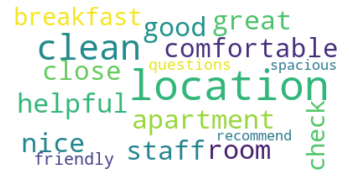

In [110]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [111]:
# looking at the reviews for hotels 
urls_hotel = ["https://www.booking.com/hotel/pt/blue-liberdade.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=673356804_275493258_2_2_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=3;highlighted_blocks=673356804_275493258_2_2_0;hpos=3;matching_block_id=673356804_275493258_2_2_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=673356804_275493258_2_2_0__104796;srepoch=1670772758;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/star-inn-lisbon-smart-choice.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=2021231&dest_type=hotel&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=d5969066b7760298&srepoch=1670790736&all_sr_blocks=202123116_94664593_0_1_0&highlighted_blocks=202123116_94664593_0_1_0&matching_block_id=202123116_94664593_0_1_0&sr_pri_blocks=202123116_94664593_0_1_0__49840&tpi_r=2&from_sustainable_property_sr=1&from=searchresults&show_room=202123116#RD202123116", "https://www.booking.com/hotel/pt/myriad-by-sana-hotels.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=41446901_230381432_2_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=22;highlighted_blocks=41446901_230381432_2_1_0;hpos=22;matching_block_id=41446901_230381432_2_1_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=41446901_230381432_2_1_0__145600;srepoch=1670772758;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/avenida-palace.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=3944602_0_2_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=40;highlighted_blocks=3944602_0_2_1_0;hpos=15;matching_block_id=3944602_0_2_1_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=3944602_0_2_1_0__123661;srepoch=1670775100;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/portugal-boutique.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=73112502_365086725_0_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=42;highlighted_blocks=73112502_365086725_0_1_0;hpos=17;matching_block_id=73112502_365086725_0_1_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=73112502_365086725_0_1_0__90200;srepoch=1670775100;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/epic-sana-lisboa.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=47070002_240623591_2_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=43;highlighted_blocks=47070002_240623591_2_1_0;hpos=18;matching_block_id=47070002_240623591_2_1_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=47070002_240623591_2_1_0__117600;srepoch=1670775100;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/h10-duque-de-loule.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=14&hapos=64&sr_order=bayesian_review_score&nflt=review_score%3D80&srpvid=d57b6d4a1c4000a1&srepoch=1670776031&all_sr_blocks=129179301_203940320_0_2_0&highlighted_blocks=129179301_203940320_0_2_0&matching_block_id=129179301_203940320_0_2_0&sr_pri_blocks=129179301_203940320_0_2_0__91600&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/the-one-palacio-da-anunciada.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=404080626_203945817_2_2_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=109;highlighted_blocks=404080626_203945817_2_2_0;hpos=9;matching_block_id=404080626_203945817_2_2_0;nflt=review_score%3D80;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=404080626_203945817_2_2_0__140600;srepoch=1670776241;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/lux-lisboa-park.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=15&hapos=115&sr_order=bayesian_review_score&nflt=review_score%3D80&srpvid=d57b6d4a1c4000a1&srepoch=1670776241&all_sr_blocks=149861806_0_2_1_0&highlighted_blocks=149861806_0_2_1_0&matching_block_id=149861806_0_2_1_0&sr_pri_blocks=149861806_0_2_1_0__110695&tpi_r=1&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/asjanelasverdes.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=25&hapos=150&sr_order=bayesian_review_score&nflt=review_score%3D80&srpvid=d57b6d4a1c4000a1&srepoch=1670776729&all_sr_blocks=3859702_362060957_0_2_0&highlighted_blocks=3859702_362060957_0_2_0&matching_block_id=3859702_362060957_0_2_0&sr_pri_blocks=3859702_362060957_0_2_0__145080&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/palacio-do-governador.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=76&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670777443&all_sr_blocks=151190201_91593023_0_1_0&highlighted_blocks=151190201_91593023_0_1_0&matching_block_id=151190201_91593023_0_1_0&sr_pri_blocks=151190201_91593023_0_1_0__79700&tpi_r=2&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/bessahotel-lisboa.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=7&hapos=82&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670777443&all_sr_blocks=104025503_91944042_0_2_0&highlighted_blocks=104025503_91944042_0_2_0&matching_block_id=104025503_91944042_0_2_0&sr_pri_blocks=104025503_91944042_0_2_0__101920&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/porto-bay-liberdade.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=83907302_0_2_0_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=102;highlighted_blocks=83907302_0_2_0_0;hpos=2;matching_block_id=83907302_0_2_0_0;nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=83907302_0_2_0_0__101952;srepoch=1670777854;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/tvlisboalisboa.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=6&hapos=156&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670778271&all_sr_blocks=3863236_182321532_0_0_0&highlighted_blocks=3863236_182321532_0_0_0&matching_block_id=3863236_182321532_0_0_0&sr_pri_blocks=3863236_182321532_0_0_0__136700&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/four-seasons-ritz-lisbon.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=14&hapos=164&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670778271&all_sr_blocks=45192730_204840476_2_0_0&highlighted_blocks=45192730_204840476_2_0_0&matching_block_id=45192730_204840476_2_0_0&sr_pri_blocks=45192730_204840476_2_0_0__352600&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/rossio-plaza.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=17&hapos=167&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60&srpvid=d57b6d4a1c4000a1&srepoch=1670778271&all_sr_blocks=779374002_336310792_0_2_0&highlighted_blocks=779374002_336310792_0_2_0&matching_block_id=779374002_336310792_0_2_0&sr_pri_blocks=779374002_336310792_0_2_0__68876&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/vip-executive-picoas.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=476834202_150041383_2_2_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=186;highlighted_blocks=476834202_150041383_2_2_0;hpos=11;matching_block_id=476834202_150041383_2_2_0;nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=476834202_150041383_2_2_0__53440;srepoch=1670779246;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/altis-belem-spa.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=4463402_91457354_0_1_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=187;highlighted_blocks=4463402_91457354_0_1_0;hpos=12;matching_block_id=4463402_91457354_0_1_0;nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=4463402_91457354_0_1_0__138400;srepoch=1670779246;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl", "https://www.booking.com/hotel/pt/zurin-charm.en-gb.html?label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&aid=1610684&ucfs=1&arphpl=1&checkin=2023-04-04&checkout=2023-04-08&dest_id=-2167973&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=7&hapos=7&sr_order=bayesian_review_score&nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60%3Bclass%3D3&srpvid=d57b6d4a1c4000a1&srepoch=1670779698&all_sr_blocks=628803109_244986868_2_2_0&highlighted_blocks=628803109_244986868_2_2_0&matching_block_id=628803109_244986868_2_2_0&sr_pri_blocks=628803109_244986868_2_2_0__59600&tpi_r=2&from_sustainable_property_sr=1&from=searchresults#hotelTmpl", "https://www.booking.com/hotel/pt/the-lift-boutique.en-gb.html?aid=1610684&label=lisbon-XrbcDzyTwd5IiJgZiHI0GwS380942575433%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-303200405188%3Alp1011742%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YfqnDqqG8nt10AsofPfvtt0&sid=7d8521c4765f9acb346d215f29ccd8f2&all_sr_blocks=208237309_95501714_0_2_0;checkin=2023-04-04;checkout=2023-04-08;dest_id=-2167973;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=39;highlighted_blocks=208237309_95501714_0_2_0;hpos=14;matching_block_id=208237309_95501714_0_2_0;nflt=review_score%3D80%3Breview_score%3D70%3Breview_score%3D60%3Bclass%3D3;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=bayesian_review_score;sr_pri_blocks=208237309_95501714_0_2_0__87500;srepoch=1670780055;srpvid=d57b6d4a1c4000a1;type=total;ucfs=1&#hotelTmpl"]
#define function that goes through all the urls for hotels
for url in urls_hotel:
    response = requests.get(url)
    time.sleep(4)
    soup = BeautifulSoup(response.content, "html.parser")

    comments_two = soup.find_all("li", attrs = "ebb6d69bfc")
    for reviews in comments_two:
        print(reviews.text)
        time.sleep(2)



MiseonSouth Korea“Great hospitality and service, upgraded room with wonderful view, very convenient location for tour.
Great thanks again for the nice hospitality!”Read more
ErminSwitzerland“Great location, very kind staff, nice building, clean, charming”Read more
EvgeniyaArmenia“great location, facilities, staff!! very cozy rooms, everything is clean and beautiful. the best variant for staying in the center.”Read more
MariEstonia“The staff is great and helpful, the rooms clean, bed was very comfy and not too soft, the big windows that open to the plaza are lovely, there is a great seafood restaurant right downstairs so we didn't have to start finding a place to eat in the...”Read more
HollieUnited Kingdom“The hotel hugely exceeded my expectations. There was a metro stop directly outside the front door. Check in was quick and easy and the staff were friendly. In the lobby there was bottles of water, coffee, Prosecco and juice to help yourself to at...”Read more
StephenIreland“One of th

Does the spa come alongside this reservation ??Dear Guest, 
Thank you for your preference to Myriad by Sana in Lisboa. 
Yes, you have an free access to our Spa area ( swimming Pool, Sauna and Turki..Read moreAnswered on 15 June 2022
Still looking?Ask a questionSee more questions (15)
YoramIsrael“Location and service. Good location to stay in Lisbon”Read more
MinaMalaysia“The location is excellent.  Space for taxi/uber pick-up. Easy access to HOHO routes.  Safe to walk about as plenty of restaurants and people about.  liked the history of the place too. Personnel from Bell Hop, reception, breakfast staff - all...”Read more
SuleTurkey“Luxury,historical hotel,very good location in the city center.Hotel staff was very helpful.Clean rooms and very good breakfast.”Read more
AlisonCanada“Beautiful old hotel, in a great location. Very clean, excellent breakfast. Super nice touches like strawberries delivered to our room, and  complimentary use of a smart phone.”Read more
EliIsrael“I'm travelin

Still looking?Ask a questionSee more questions (15)
ООльгаRussia“everything!
- good location of Hotel to public transport. three stops to historic centre 
- room was clean and modern 
- tasty and fresh breakfast, they even served egg royal and welcomed us with sparkling wine 
- staff was friendly”Read more
TanyaIsrael“The hotel is beautiful and the service was excellent! All the staff were so helpful, kind and welcoming. 
We had such a great experience!”Read more
DeirdreIreland“Everything! Stunningly pretty hotel 🏨 Super friendly staff. Gorgeous rooms. Faultless!”Read more
MarkUnited Kingdom“Excellent smart hotel in a great location and great staff”Read more
DeeSpain“the interiors are very nice, the staff were friendly and helpful, good breakfast”Read more
AislingIreland“Stunning, modern and bright bedrooms. Everywhere was spotlessly clean. Lovely friendly and helpful staff. Very central location.”Read more
DiegoItaly“I am a very demanding type and for this I can say that the H10 Duque

Hello, I've made a booking at another hotel for two nights, but this place looks great. I'd be willing to cancel and book with you if you could includ..Hello! Please notice that our Transfer service is complementary only from 3 nights onwards. For reservations of 2 nights it has a cost of 25€. We rema..Read moreAnswered on 6 July 2022
Hi, are outdoor pool and gym open from 19.4.? 
Thank you, TjašaGood afternoon, we gladly confirm that our gym and pool are open.Answered on 17 April 2021
Is the pool open in October?Yes, it is.Answered on 16 July 2022
Still looking?Ask a questionSee more questions (15)
SusanFrance“The hotel was a lovely old building with fabulous roof terrace and patio downstairs. The lady who met us was helpful and booked a table nearby for dinner. The coffee available in lounge areas was appreciated. The honesty bar was great. The extra...”Read more
RRosemaryUnited Kingdom“Helpful approach especially being able to  store baggage and leave at our leisure.Also use the fac

מירבIsrael“Perfect location, very clean. 
Most of the stuff was very nice. great facilities an breakfast”Read more
BeepUnited Kingdom“The hotel was clean, modern, the room spacious and the bed very comfortable. Beautiful wash room. Fabulous breakfast, catering for all tastes. Huge variety of food, all delicious. Luxurious breakfast room. Staff friendly and helpful. We would...”Read more
WinnieCanada“excellent location and good facility. friendly and helpful staff.”Read more
SpinneyUnited Kingdom“lovely friendly staff and a very nice room which was clean and well equipped.”Read more
LucyUnited Kingdom“Amazingly helpful and friendly reception staff. Spotlessly clean, large room with comfy bed. Excellent location for exploring the city on foot. Breakfast was great and the restaurant staff were so sweet trying to entertain our little baby!”Read more
RonitIsrael“Excellent location. Room exceptional big and comfortable. The stuff are helpful and always wiilling to help.”Read more
KarenIrelan

JonathanUnited Kingdom“Great location and beautiful internal decoration. Very comfortable rooms.”Read more
Is there a Concierge floorWe do not have a Concierge floorAnswered on 3 November 2019
Are there blow dryers in the rooms?  
We will be traveling from US. Will we need to bring a plug in adaptor for our electronic devices?Thank you for your contact.
We do have blow dryers in the rooms and US adaptors.
Kind RegardsAnswered on 26 September 2021
How close to the center? The shopping? Rooms have bathtub?We are located in the heart of the city, 15 minutes walking to downtown where you can find the best stores in Lisbon. Our rooms do have bathtub.
Kind RegardsAnswered on 13 September 2021
what does the daily charge includeKindly note that we have different types of daily rates depending on the services included and room categories.Answered on 28 November 2022
My 2 years old bb is sleeping with parents in a same bed are we still have to book with a child ?Yes, we should always have the to

LuísPortugal“The bed size, comfortable bed, great location, and friendly staff that addressed our concerns and offered a few solutions - well done.”Read more
Anne-lusaUnited Kingdom“I enjoyed everything about my stay, the room was nice and we had an excellent scenerary from our bedroom. The breakfast was exceptional, we had a range of choices. The staff was extremely welcoming. We had less than 10mins late check in so they...”Read more
RpstortiBrazil“Location is great with an easy access if you are staying around Belem. Easy parking. Great to have Feitoria in the hotel, the restaurant is fantastic.”Read more
ClaireUnited Kingdom“Manuel at reception was so wonderful and friendly. He managed to get a last-minute reservation for the exceptional Feitoria restaurant, which was so appreciated. The restaurant was outstanding! Fantastic service and delicious food. The team there...”Read more
JohannaUnited Kingdom“lovely large rooms. nice spa and pool. good breakfasts. friendly staff.”Read more

In [112]:
hotels = """ErminSwitzerland“Great location, very kind staff, nice building, clean, charming”Read more
EvgeniyaArmenia“great location, facilities, staff!! very cozy rooms, everything is clean and beautiful. the best variant for staying in the center.”Read more
MariEstonia“The staff is great and helpful, the rooms clean, bed was very comfy and not too soft, the big windows that open to the plaza are lovely, there is a great seafood restaurant right downstairs so we didn't have to start finding a place to eat in the...”Read more
HollieUnited Kingdom“The hotel hugely exceeded my expectations. There was a metro stop directly outside the front door. Check in was quick and easy and the staff were friendly. In the lobby there was bottles of water, coffee, Prosecco and juice to help yourself to at...”Read more
StephenIreland“One of the best hotels I ever stayed in. The location is excellent. The staff are very friendly and always available to help. The rooms are clean and the beds are very comfortable. There is a fridge in the room that is topped up each day with...”Read more
RhondaUnited Kingdom“Excellent friendly staff, provided guidance on transport, restaurant recommendations and places to visit. Private transfers available to and from airport. Complimentary bottle of wine on arrival and port on departure. Hotel is new, accommodation...”Read more
RaphaelLuxembourg“Central and well connected to public transport (underground and bus).”Read more
HarrietUnited Kingdom“Wonderful staff. Our room (401) had fantastic views of the city (and also excellent soundproofing to keep out the noise of the aforementioned!). Spotlessly clean, comfortable bed, excellent shower, complimentary minibar, and the location is...”Read more
MayUnited Kingdom“location; friendly and helpful staff; pillow menu (!); and great vibe”Read more
AntonMoldova“Great location & amazing service, a great thanks to João Adem for being so professional and helping with everything! The breakfast is really great and tasty.”Read more
Is there a storage for baggage?Hello!
Yes, we do have a storage for baggage.
Best Regards,
Hotel Blue LiberdadeAnswered on 7 June 2021
Ola boa noite. Do you have a place to park my car?We do not have a park in the hotel. However, we work with a parking lot in Praça dos Restauradores, €23,00 per 24 hours. 
Best regards, 
Sandra Veliça..Read moreAnswered on 25 February 2022
Hi. Traveling from Canada. We are fully vaxxed. Do you require any addy testing before checkin?  ThxSince the 19th February 2022 is not required to present a Covid-19 negative test or the vaccination certificate in Hotels/Restaurants.Answered on 23 February 2022
Hi. If predeparture flight test is positive is it possible to have meals delivered to your room?Hello,
Yes, it's always possible to deliver food at your door.
Best RegardsAnswered on 23 February 2022
Hello !
Are there rooms for 3 adults ( 2+ extra bed) available) pleaseDear guest,

First of all we would like to thank you for choosing Blue Liberdade Hotel for your stay.
Following your message we kindly ask you to send..Read moreAnswered on 12 January 2022
Still looking?Ask a questionSee more questions (15)
KathUnited Kingdom“Everything. The restaurant had long opening hours and the breakfast well presented with a vast array of choices.  Room was great,  very good showers. It was very quiet.”Read more
ReidCanada“We experienced hard beds throughout our 15- day trip to Portugal. Our backs were taking a beating. But the Star Inn Lisbon Airport had much softer and more comfortable beds than anywhere else we stayed.

And the staff were excellent and engaging,...”Read more
AlisonUnited States“Perfect spot next door to the terminals. Comfortable bed, great breakfast. And perfect location when my family arrived at the airport the next morning.”Read more
ArianePortugal“The stuff was very friendly and they serve food  almost all around the clock. You can walk to the airport which is very convinient.
The beds are super comfortable.”Read more
AlonSouth Africa“Regular airport shuttle available. Being an airport hotel, there is also food available from 2am. Ideal for business travel.”Read more
EricaGermany“comfortable and decent, right next to the airport. perfect for early morning travel”Read more
DanielaItaly“clean, comfortable bed, good breakfast, super close to the airport”Read more
DavidCanada“Second time staying here. Exceeds expectations . Will not hesitate to stay again.”Read more
FleurNorway“Close to the airport, friendly staff and early breakfast.”Read more
AngelaUnited Kingdom“we needed somewhere close to the airport.  This one is 100 yards away”Read more
How do we get to departures, walk, and if so, how long? RegardsThe Star inn Lisbon hotel is a 5-minute walk from Terminal 1. There is a pedestrian route with signs indicating the way.Answered on 8 January 2021
Hello, 
If I land at 00:30 am on 22.09, will I be able still check-in and get a shutte so late? 
Thank you for reply
OlaGood afternoon,

Yes, its possible, we just have to put that information in your reservation. 
The shuttle is running until midnight.

Best regards,
P..Read moreAnswered on 29 September 2020
I need to check out early in the Morning (3 am) - is that possible or you would charge me for that?Good morning,

Yes you can make the check-out at 3am.

Best regards,
Patrícia AlgarvioAnswered on 27 January 2021
do you have coffee and tea facilities and every roomGood afternoon,
Thank you in advance for your contact.
We do not have coffee in the rooms, we have a coffee machine in the self-service reception and ..Read moreAnswered on 4 August 2021
What time is first shuttle to the airport?Good evening, 

The hotel has a free shuttle service that starts from 4 a.m. until 12 a.m. every 20 minutes.
Answered on 16 November 2020
Still looking?Ask a questionSee more questions (15)
EdmundUnited Kingdom“Such a beautiful hotel and great staff. Every concern raised was dealt with quickly by the front desk. Awesome service. The Spa treatments were one of the best I've had in a long while.”Read more
VitaliyUnited Kingdom“One of the best 5 star 🌟 hotel ever. Everything was amazing 👏”Read more
StephenFrance“beautiful views, excellent service, rooms superb, restaurant service and food excellent, buffet breakfast unbelievable 
just perfect for a romantic weekend”Read more
JudyUnited Kingdom“Amazing hotel. Very friendly staff. Hotel is spotless and situated in a beautiful location.”Read more
AlionaMoldova“Very convenient location for the Websummit daily events, amazing views from the windows, swimming pool and SPA”Read more
AlonaIsrael“The room is big with view to the river, on the high floor.
Very good breakfast, variety of foods.
Room was ready when i arrived earlier than check-in time - that was really great and convenient.
Good SPA, sauna and swimming pool”Read more
PatricuaCanada“the room is beautiful, comfortable, decoration and beautiful view excellent staff, very friendly staff, a 5 star breakfast”Read more
IanUnited Kingdom“great bar / terrace , rooms are a good size and well designed”Read more
EdwinSwitzerland“Facilities were great and especially the staff did everything possible to make us comfortable. A special thanks for the Breakfast crew: there service was beyond any of our expectations, really great.”Read more
ClaudiaUnited Kingdom“Breakfast, location, facilities, staff, cleanliness, views”Read more
Good evening
We are looking at booking you for a one day trip next summer en route to Pico with flight into Lisbon arriving 21:25 - is OK for checking..Dear Guest,
Thank you for your question.
Our reception is open 24h so you can check-in and check-out at that time, no problem.
Kind regards,
Diana GnatyukRead moreAnswered on 2 November 2021
Dears,
I would ask if you have Shattaf or bidets in all your bathrooms?Dear Guest, 
Yes we have bidets in all rooms.
Best Regards,
Ana Conceição Answered on 7 October 2022
What times are check insDear Guest, 

Thank you for your preference towards MYRIAD by SANA Hotels.

Our check-in time starts at 15:00pm 

Best regards
Guest Relations

Answered on 27 July 2022
Hi, do all rooms come with free access to the Spa? Or does this come at an extra cost?Dear Guest, 

Thank you for your preference towards Myriad by SANA Hotels. 

Yes, all our guests has an free access to our Spa Area. 

Our warm regard..Read moreAnswered on 26 July 2022
Does the spa come alongside this reservation ??Dear Guest, 
Thank you for your preference to Myriad by Sana in Lisboa. 
Yes, you have an free access to our Spa area ( swimming Pool, Sauna and Turki..Read moreAnswered on 15 June 2022
Still looking?Ask a questionSee more questions (15)
YoramIsrael“Location and service. Good location to stay in Lisbon”Read more
MinaMalaysia“The location is excellent.  Space for taxi/uber pick-up. Easy access to HOHO routes.  Safe to walk about as plenty of restaurants and people about.  liked the history of the place too. Personnel from Bell Hop, reception, breakfast staff - all...”Read more
SuleTurkey“Luxury,historical hotel,very good location in the city center.Hotel staff was very helpful.Clean rooms and very good breakfast.”Read more
AlisonCanada“Beautiful old hotel, in a great location. Very clean, excellent breakfast. Super nice touches like strawberries delivered to our room, and  complimentary use of a smart phone.”Read more
EliIsrael“I'm traveling for many years, been in 5 stars hotels in four continents, and if I need to sum up my experience, in one word...WOW

Location WOW
Stuff WOW
Breakfast hall and food WOW
My family felt like a royal family 

4 amazing nights!”Read more
GiancarlaAustralia“everything about the hotel was exceptional. staff were all professional, friendly and helpful. rooms and bar were fabulous.”Read more
Reyna11111Switzerland“Best posible location. Breakfast was excellent. The room and the amenities were just perfect. Place to stay in Lisbon!”Read more
BeverleyUnited Kingdom“Great location, room was clean, air con on (it was HOT outside!) breakfast selections were great.”Read more
VivienneAustralia“Very luxurious. close to a range of attractions. enjoyed the live piano playing in the lounge. great breakfast”Read more
JoanneSri Lanka“Beautiful old building in the heart of the city, walking distance to most attractions. And they made us feel so special with the friendly service. Breakfast was exceptional with fresh fruit, pastries, yoghurt, eggs, bacon, cheeses, fresh juices...”Read more
Price of breakfast if not included in priceThe price of the Breakfast is 30€Answered on 26 August 2021
are  there irons in the bedrooms'Dear Sir/Madam
Thank you for your message.
We do have a vertical iron for Guests to use in the rooms.
Please be so kind to request it upon arrival, at..Read moreAnswered on 20 September 2021
Is your Hotel wheelchair friendly through out?Unfortunately we are notAnswered on 26 August 2021
Can Uber get to the hotel entrance?Yes, it is possible.Answered on 18 September 2021
What are the Sunday Hours of the breakfast buffet ? Is there a room service menu for dinner ?Breakfast time is always the same between 7:00 amd 11:30, our Room Service menu only serves Light MealsAnswered on 26 August 2021
Still looking?Ask a questionSee more questions (12)
MarjattaFinland“I liked everything in this hotel
Exelent situation nice staff
Good  breakfast. I thank you for good vacance”Read more
LinaEgypt“The room was spacious. They had a bell captian. They allowed us to leave our luggage after checkout for free.”Read more
GeorgeUnited Kingdom“rooms were huge and well maintained, very comfortable and if a high standard. location was excellent!”Read more
ErichoGermany“The staffs are friendly especially Eduardo, he served us nice breakfast with his 100% passion. That enhances our satisfaction of staying a lot, we will come back and expect to see him again! The hotel service is more than 4star!!”Read more
LyneyteUnited Arab Emirates“The hotel staff were awesome and all spoke English.”Read more
LanSwitzerland“Excellent location for sightseeing. The breakfast is great, a lot of choice and the staff at the reception and restaurant is more than welcoming and very helpful. The room is spacious, clean. The bathroom size is just great with doppel lavabo,...”Read more
SteveUnited Kingdom“We were upgraded, thankfully. Breakfast was great, served by lovely staff. Reception staff were really helpful.”Read more
PaulaIreland“The best hotel we have stayed in. The staff extremely friendly and so helpful and very clean. Breakfast excellent.”Read more
CharlotteUnited Kingdom“super clean, all of the staff from cleaners to waitresses to reception were exceptionally friendly and could not do enough to help in any way they could. breakfast was exceptional”Read more
LynetteUnited Kingdom“Very spacious room, we had an upgrade as it was our honeymoon, also complimentary bubbly and chocolates. However we had no hot water for the first 24hours which ended up being a fault throughout the hotel. The robes are tiny and we asked for a...”Read more
Are there showers in the bathromDear Sirs,

Thank you for your email.

We are pleased to inform we have rooms with shower.

Please inform this request when making the booking, and we..Read moreAnswered on 5 November 2019
Are there tea and coffee facilities in the rooms?There are coffee and tea facilities available, in our Deluxe rooms.Answered on 6 July 2020
Hi do the deluxe rooms have a small refrigerator?Dear Sir

Thank you for your message.

Our rooms has mini refrigerator.

Please let us know if oyu need further assistance.

Thank you
Kind regards
Bo..Read moreAnswered on 18 May 2021
what time do you open the buffet breakfast? would it be possible to have the breakfast at 07:30 as we will be leaving to the airport at around 08:00Our breakfast from will be open from 07:00 until 11:00Answered on 18 May 2021
Do your rooms have a balconyWe are pleased to inform the majority of the Deluxe Rooms have balcony.Answered on 30 September 2020
Still looking?Ask a questionSee more questions (15)
DianaPortugal“The staff was exceptional - super nice, always available with a smile, the room was amazing and the bed super comfy. Very very good stay!”Read more
BetaUnited Kingdom“Spa area is the gem. Breakfast was great, staff was welcoming all the time. Location could be slighty better, but it’s a short drive to the city centre.”Read more
MarkUnited Kingdom“Very high end, fabulous infinity pool, great location.”Read more
BerniceUnited Kingdom“an exceptional property, ultra modern and beautifully presented”Read more
NetteSwitzerland“the service is amazing, extremely friendly 
then breakfast ist fantastic”Read more
KlemCanada“Amazing staff, very clean and comfortable room. The breakfast was exceptional, the best that we had so far. The beds are really comfy and the curtains closes and lights are automatically turn off when you leave the room. The location is not bad, a...”Read more
AhmedSaudi Arabia“The room was clean, spacious, and comfy
The staff were very friendly and helpful
Breakfast was OK, the same every day, and had some variety 
Pool, spas, and other facilities were excellent”Read more
StewartUnited Kingdom“The staff all round were excellent, and that applies especially to the cleaning staff. We were impressed by the fact that  the room was made up multiple times each day. Waiting staff were always friendly and helpful as were the staff at the top...”Read more
BaretUnited Kingdom“Breakfast selection was excellent. The food was delicious. Lunch was great on ground floor terrace.
The spa was very good too as were the treatments.”Read more
JoacimNorway“The hotel was fantastic! From the size and standard of the rooms to the pool & spa area and the extraordinary breakfast. But the best was the genuine attention to their guests and the service you get. You get help with everything. And we felt so...”Read more
Where can baby sleep?We provide a baby crib free of charge.Answered on 17 February 2020
Hello! You mention that Pets are allowed with no extra charges. For 1-night stay, does the dog stays in the room?We kindly inform you that Pets under 10 kilos are allowed in our hotel.  Answered on 7 May 2021
Is the pool running all seasons or only during summer?The rooftop pool is open in the Fall and Spring if the weather allows it.

Kind regards,
EPIC SANA Lisboa TeamAnswered on 26 October 2021
Hello. 

Is the outdoor pool open for next week and is it heated ?The outdoor pool is heated, however it will only open in the spring when the weather allows it.

Kind regards,
EPIC SANA Lisboa TeamAnswered on 21 January 2022
Hi, do you have clothes iron in your rooms?We kindly inform that we can provide clothes iron in the room.Answered on 19 July 2022
Still looking?Ask a questionSee more questions (15)
ООльгаRussia“everything!
- good location of Hotel to public transport. three stops to historic centre 
- room was clean and modern 
- tasty and fresh breakfast, they even served egg royal and welcomed us with sparkling wine 
- staff was friendly”Read more
TanyaIsrael“The hotel is beautiful and the service was excellent! All the staff were so helpful, kind and welcoming. 
We had such a great experience!”Read more
DeirdreIreland“Everything! Stunningly pretty hotel 🏨 Super friendly staff. Gorgeous rooms. Faultless!”Read more
MarkUnited Kingdom“Excellent smart hotel in a great location and great staff”Read more
DeeSpain“the interiors are very nice, the staff were friendly and helpful, good breakfast”Read more
AislingIreland“Stunning, modern and bright bedrooms. Everywhere was spotlessly clean. Lovely friendly and helpful staff. Very central location.”Read more
DiegoItaly“I am a very demanding type and for this I can say that the H10 Duque de Loule organization has met all my expectations. thank you very much for helping to make my stay in Portugal enjoyable”Read more
FionaUnited Kingdom“Very nice hotel, great breakfast, lovely helpful staff, very clean and comfortable. Great location for getting around. Thats all you need”Read more
PUnited Kingdom“Great location very close to the metro. The room was very spacious, clean and had everything we needed. The bed was comfortable and provided a good night sleep. The bathroom was clean, in great condition and with toiletries from Rituals. I would...”Read more
EdithCanada“Breakfast was amazing. 
Location was okay. Walk to Rossio Square is 20 minutes more or less. Don't waste your money on taxi. Use uber instead. The most I liked was the front desk staff. At least 3 of them helped to plan my trip. They suggested...”Read more
Boa Tarde , gostava de saber a hora de check in (para sábado dia 19) tendo em conta as restrições de circulação após as 13:00.Boa Tarde,

 Informamos de que o check-in é realizado nas horas habituais (14h30), sendo que se possivel, se o quarto já se encontrar pronto antes é p..Read moreAnswered on 14 December 2020
please could tell me the check in and check out time for the hotel thank you
Dear guest,

thank you for your contact.

The check in time is from 15:00 and check out until 12:00.

best regards,
Reservations departmentAnswered on 31 October 2022
Is there a fridge in room?Dear guest, yes we have a mini bar available in all rooms.  We are at your disposal for further information. Kind regards, H10 Duque de LouléAnswered on 24 October 2022
What time is breakfast served?Dear Guest, the breakfast is served between 7:00 and 10:30 or 11:00 on weekends. We are at your disposal for further information. With kind regardsAnswered on 24 October 2022
Hi, do you have a luggage storage room? To store suitcases before check-in or after check-out?Dear Sir/Madam, 

Thank you for your question. 

We do provide luggage storage service before  check-in and after check-out for our guests upon reques..Read moreAnswered on 23 September 2022
Still looking?Ask a questionSee more questions (7)
DavidUnited Kingdom“Location
The palazzo architecture 
Pool/pool side sun bathing 
Staff”Read more
RachelUnited Kingdom“The room was fantastic, nice design/decor. Bed and pillows were like clouds, so comfortable! Staff were brilliant, so friendly and helpful. We had some delicious cocktails in the garden bar. The location is fab, just a short walk from Rossio Square.”Read more
PatrickUnited Kingdom“staff were absolutely delightful - very personable and proud of their hotel”Read more
MargareteMonaco“it was impressive. clean and friendly staff. great library and art collection”Read more
RichardUnited Kingdom“Very comfortable and convenient hotel in centre of Lisbon.  In old palace.  Superb breakfast, very nice courtyard & swimming pool areas.  Friendly and helpful staff.”Read more
MichaelUnited Kingdom“Don't hang back at breakfast  - a great range of options and you can try them all.    The same superb room is an excellent place for a drink before going out into a city with a vast range of  very good restaurant options.”Read more
AnnaGermany“stylish and classy estate just in a very center of Lisboa.  great, extremely tasty breakfast and very professional staff!”Read more
JanetUnited Kingdom“My daughter and I stayed for 5 wonderful nights at this beautiful hotel. The location of the hotel is fantastic, right in the heart of the old town and close to a railway station and tram station.  The hotel has been sympathetically restored with...”Read more
ChristinaUnited Kingdom“The location was good and the bed was comfortable.”Read more
JustineUnited Kingdom“beautiful property, very comfortable room and lovely pillows which I would liked to take home! travel kettle needed only a coffee pod machine! Super cafe a couple of doors up from hotel serving good breakfast and coffee.”Read more
Is the spa open ?Hello,

No, the spa is not open due to new rules coming from the Portuguese government.

Kind regards.Answered on 7 February 2021
Are the spa and pool open ?The Spa is open every day from 11 am to 8 pm. The inside pool and sauna have the same timetables. For the inside pool and sauna, we ask for a previous..Read moreAnswered on 8 November 2021
Hello 
Please can you advise how much is is for a dog, I will be traveling with 2 small well behaved dogs 
Thank youHello! It costs 25€/day/dog. Kind regards.Answered on 2 September 2022
Hello is the outside poil open? ThanksDear guest, 

We are more than happy to inform you that our outside swimming pool is currently open. 

Hope the information finds you well. 

Best regards. Answered on 18 May 2021
Is your pool openDear guest, 

We are glad to inform you that the outside swimming pool remains open. 

Best regards. Answered on 18 May 2021
Still looking?Ask a questionSee more questions (15)
IanHong Kong“staff were excellent and very helpful. Room was comfortable. Breakfast was absolutely first class.”Read more
HennaCanada“The location was perfect and central. Loved walking down av. De liberdad which was 10 min from the hotel. The rooftop has beautiful views plus the heayed pool and hot tub were excellent for early morning dips and eveming relaxation. 
The staff...”Read more
BerlinGermany“This was our second visit to Lux Lisboa.  The rooms are small but efficient and very clean.  The breakfasts are excellent and the bar friendly and reasonably priced.  The staff is outstanding - very helpful, friendly, and eager to give assistance....”Read more
FranciscoPortugal“Perfect location , excellent staff, really nice rooms ! Probably the best in uptown Lisbon!”Read more
ClaudiaGermany“the room was spacious the interior of taste and the staff discrete and polite.”Read more
BobbyUnited Kingdom“Heated Swimming pool was fantastic in November after a long day tromping the streets”Read more
CarolUnited States“Can't say enough about the very friendly and accommodating nature of the staff. Reception, dining room servers, everyone-terrific and enjoyable. Lovely room, comfortable

The room was beautifully designed and the view into the interior courtyard...”Read more
DonnaUnited Kingdom“We loved our stay at Lux Lisboa.  After a last minute booking at 11pm after our flight was cancelled we were greeted by the friendly night staff and our room had been made up with an extra bed for our daughter.
The breakfast, and the breakfast...”Read more
AnaGermany“Clean and comfortable room!
Friendly staff and convenient location!”Read more
JacekPoland“A nice hotel a bit off the main paths of Lisbon, but manageable if you use taxi, or can walk 1,7km to metro station.  Bar and pool at the roof allow for a good relax in a sunny day, appreciated by those from the north. Clean, personnel very...”Read more
is the spa and fitness center open? or is close due to COVIS 19 reasons?Dear,

All the hotel facilities are working with some restrictions, except the jacuzzi.

With our best regards,

David Ane Answered on 26 October 2020
Hi. Is the open pool working in august ? And is the WiFi for free ? Thank youWe gladly confirm our pool is working and that our Wi-Fi is free. Thank youAnswered on 1 June 2021
Hello, I've made a booking at another hotel for two nights, but this place looks great. I'd be willing to cancel and book with you if you could includ..Hello! Please notice that our Transfer service is complementary only from 3 nights onwards. For reservations of 2 nights it has a cost of 25€. We rema..Read moreAnswered on 6 July 2022
Hi, are outdoor pool and gym open from 19.4.? 
Thank you, TjašaGood afternoon, we gladly confirm that our gym and pool are open.Answered on 17 April 2021
Is the pool open in October?Yes, it is.Answered on 16 July 2022
Still looking?Ask a questionSee more questions (15)
SusanFrance“The hotel was a lovely old building with fabulous roof terrace and patio downstairs. The lady who met us was helpful and booked a table nearby for dinner. The coffee available in lounge areas was appreciated. The honesty bar was great. The extra...”Read more
RRosemaryUnited Kingdom“Helpful approach especially being able to  store baggage and leave at our leisure.Also use the facilities. Very helpful as we had a 92yr old with us.
It was lovely being able to sit enjoy the peaceful surroundings and help yourself to refreshments”Read more
ToniUnited Kingdom“A perfect refuge to return to after a busy days sightseeing. The permanent tea, coffee, cakes etc table was much appreciated.
The quiet location was ideal with a bus stop nearby and the train station a few minutes walk away to get to all the...”Read more
CarolineUnited Kingdom“friendly and professional staff
cosy and homely decor with nice touches such as library, drinks stations”Read more
NigelUnited Kingdom“The hotel seemed more like an up-market club than an hotel. We were enormously impressed with the high quality of all that was on offer. We loved the residents' lounge where from noon coffee, tea, flavoured water, pastries etc were available. It...”Read more
CatherineUnited Kingdom“Lovely quiet hotel with excellent staff. Complimentary afternoon tea and cake was wonderful! On useful bus routes into the centre”Read more
HilaryNew Zealand“charming decor in the rooms and spacious.lovely garden for breakfast and a great library and balcony for drinks. Free tea  and coffee with delicious baking on the ground floor lounge .complimentary port wine in the rooms. Area full of great cafes...”Read more
AndrewPortugal“Beautiful old hotel in the centre of Lisbon, located near the waterfront and right next to the Museum of Ancient Art.
It has been converted from a number of old town houses and there are interesting stairs and corridors everywhere.
There are...”Read more
KerrenAustralia“Excellent breakfast in the garden.
The room and bathroom were of a comfortable size with good facilities.
The library and balcony were great to enyoy a drink and take in the view of the harbour.”Read more
TaniaUnited States“Very helpful, friendly staff, quiet room, lovely view on the river. Close to bus stop and quick access to the central part of the city.”Read more
Do you have a barGood evening,
Our hotel has two honor system bars (on the main floor and on the top floor) available 24 hours where our guests can help themselves.
Re..Read moreAnswered on 23 January 2020
Hi there, are you complimentary toiletries Molton Brown brand? Kind regards.Dear Madam/Sir,
Thank you for your message.
Responding to your question, yes we are.
Shall you wish anything else, we remain at your disposal.
Sincere..Read moreAnswered on 21 November 2021
Do you speak English?Dear Sir/Madam,
Thank you for your contact.
Yes we do speak English.
Best regards
Elsa Garcia
Front OfficeAnswered on 17 February 2020
Do you have an elevator?  If not, how would we get our luggage to the room?  We would have one large bag which would be difficult for us to go up stairs.
ThanksDear Madam/Sir,

Thank you for your message.
Responding to your question, yes, we do have an elevator.
Shall you need anything else, we remain at your..Read moreAnswered on 21 November 2021
do you have parkingDear Sir/Madam,

Thank you for your message.
We do have a parking which costs 15€ per night. Since we only have 4 places reservation is advisable.
Bes..Read moreAnswered on 31 October 2021
Still looking?Ask a questionSee more questions (6)
CamilleFrance“The hotel is gorgeous, the staff is delightful and I can only recommend a massage at the Hotel Spa. The location was also particularly quiet in comparison to central Lisbon and close to the sea-side !”Read more
JovanaFrance“Perfect location near museums and tourist sites.  It's an Authentic hotel with history, the Governors palace is revamped with style. It's romantic, calm, huge rooms and bathrooms  with comfortable beds, beautiful garden.  The chapel that became...”Read more
LinoUnited Kingdom“Overall quality of the hotel, attention to detail, extremely friendly staff and exceptional customer service. 
Highly recommend this hotel!”Read more
AnnaUnited Kingdom“conveniently situated for tram 
excellent spa facilities
friendly helpful staff
good breakfast selection
clean room and excellent housekeeping service”Read more
ChristianGermany“Very friendly staff. Backery and Supermarket and good Restaurant around the corner. Breakfast was amazing. Spa was included and very nice. Public Transport right at the Hotel. 30 minutes to Central of Lisbon”Read more
MagdaleneHong Kong“The staff are all helpful and friendly. Offered clear instructions in how I may park our car, find specific shop, bike route, or even just a few restaurant suggestions, all precise, concise and quick to the key points.

Staying in an antique...”Read more
LeonardusNetherlands“It is a great place in a very nice area. Well connected to the public transport.”Read more
DevCanada“What we love about Portugal, and Europe generally, is the blending of old and new. Palacio do Governador does this beautifully. The building threshold tells you something about the Roman ruin, and the lobby says something about the Governor's...”Read more
AlexandruRomania“Very friendly and helpful staff, very clean rooms, EXCELLENT breakfast!!! Good location”Read more
TrezinhaPortugal“It’s a very beautiful property located close to the river, so you can go for walks and bike rides.”Read more
Hello! Do you offer early check in? We will be landing at 7am from Canada.
Thank you! 
L.Dear guest, we would like to inform that we can provide early check in according to availability and it is subject to a fee. In order to guarranty the..Read moreAnswered on 19 February 2020
Hi is the pool open and is it heated? Also are the spa facilities open?Dear Sir/Madam,

Our outdoor swimming pool is closed and it's not heated, it'll open in May for Summer Season.

The SPA facilities are open, including..Read moreAnswered on 2 February 2022
Se tiene acceso al spa con cualquier tipo de habitación, cuánto tiempo al día y con que horarios ?
GraciasEstimado Cliente,
Informamos que o spa está incluído na reserva. Funciona entre as 10h00 e as 20h00, no entanto deverá sempre reservar antecipadamente..Read moreAnswered on 26 August 2021
is the swimming pool included within the price when making a reservation? or does it has an extra fee charge? in that case how much it would be? many thanks!Dear Guest.
Following your question, we inform that you will be able to enjoy our swimming pool since is a complimentary faciltyAnswered on 4 June 2021
Hi, is the indoor swimming pool available to use? And other activities in the hotel such as Spa and etcDear Mr(s). Guest,

We thank you for your message.

All our facilities in the hotel are available.

Best regards,
Aldair Silva
Front Desk Team Answered on 13 March 2022
Still looking?Ask a questionSee more questions (15)
RaghuIndia“We loved the size of the room we were allotted and the cappuccino machine in the room. There’s a little balcony attached to the room. The location is on the same street as the luxury brands.
The buffet breakfast has an excellent spread and a chef...”Read more
DavidSingapore“Well located designer Hotel I. Modern style. Rooms and Public spaces tastefully done. Great pool and garden area. Excellent breakfast and good food in restaurant”Read more
MarisLatvia“Very nice, spacious, clean room. Central location in Lisbon.”Read more
NiamhIreland“- ideally central location, right beside Metro station Restauradores
- within easy walking distance of so many key sights
- wonderful facilities (including lovely pool and terrace, sauna)
- amazing staff, so helpful on every front
- spic and span...”Read more
מירבIsrael“Perfect location, very clean. 
Most of the stuff was very nice. great facilities an breakfast”Read more
BeepUnited Kingdom“The hotel was clean, modern, the room spacious and the bed very comfortable. Beautiful wash room. Fabulous breakfast, catering for all tastes. Huge variety of food, all delicious. Luxurious breakfast room. Staff friendly and helpful. We would...”Read more
WinnieCanada“excellent location and good facility. friendly and helpful staff.”Read more
SpinneyUnited Kingdom“lovely friendly staff and a very nice room which was clean and well equipped.”Read more
LucyUnited Kingdom“Amazingly helpful and friendly reception staff. Spotlessly clean, large room with comfy bed. Excellent location for exploring the city on foot. Breakfast was great and the restaurant staff were so sweet trying to entertain our little baby!”Read more
RonitIsrael“Excellent location. Room exceptional big and comfortable. The stuff are helpful and always wiilling to help.”Read more
KarenIreland“wonderful staff. great location , lovely facilities . 
Breakfast was wonderful too”Read more
MelanieGermany“Very friendly staff. The room was very comfortable, especially the bed. Room service we used several times worked very well. Very nice creative design, e.g. beautiful tiles in portuguese style outside. It is correct, that sometimes airplanes are...”Read more
MarkUnited Kingdom“Quality of breakfast was excellent and attentiveness of staff. Highly recommend this hotel for location, quality of service and breakfast.”Read more
MariamUnited Kingdom“Beautiful hotel in the perfect location for shopping and exploring the city - well connected and easy to walk to places (close proximity to downtown too).

Hotel staff were lovely and the room was very comfortable, accommodated all of our needs....”Read more
SaraUnited Kingdom“The location and the amazing staff who works there! Everyone was super helpful (from receptionists to cleaners).”Read more
JamesUnited Kingdom“Beautiful hotel, the staff were amazing from the moment we arrived outside until we left. The Spa was a great place to relax and unwind. Absolutely nothing not to like about this hotel.”Read more
PhilipUnited Kingdom“Staff were very attentive and helpful .
Location excellent”Read more
MarthaJersey“The hotel was in a great location with everything that could be required for a short break in a City. The room was well appointed and the added bonus of the outside terrace was lovely.”Read more
JacquelinePortugal“Fabulous room. Very comfy large bed. Coffee and tea making facilities available in the room. Very helpful staff.”Read more
ClaireUnited Kingdom“smart, modern hotel with friendly attentive staff. luxury without being stuffy. 
restaurant was excellent, breakfast delicious. 
concierge very helpful and knowledgable about things to see and do.”Read more
Hi 

Is there a height restriction for the parking?

Thanks

DavidDear Mr. David,
Kindly note that our parking has a height limit of 2.10 meters.Answered on 1 November 2022
are babies allowed in the pool?
The babies are allowed in our heated indoor pool, always accompanied by an adult.Answered on 17 December 2022
Hello! Really hoping to come back and visit again next month! 
Just wanted to enquire what your half board option entails? 
Thank you! We are looking forward to welcome you back! Our Half Board includes the breakfast and the dinner ( with 3 course menu meal, excluding beverages)Answered on 24 October 2022
Does the junior suite have a separate living room area with sofa bed.  If so could a single bed be placed in this room.Our Junior Suites and Suites can indeed be divided in two areas, the bedroom and the living room with a sofa bed that can be open upon request.Answered on 24 October 2022
GarryUnited Kingdom“A beautiful hotel in a perfect location for walking around the centre of Lisbon. The service was excellent . Having an outdoor pool was a great bonus . It was truly worthy of its 5 stars”Read more
DesmondIreland“The young concierge Carolina Costa was excellent & an asset to the hotel”Read more
LauraUnited Kingdom“A very beautiful hotel with excellent staff. The breakfast was delicious with plenty of options and the location is fantastic”Read more
ZitaUnited Kingdom“Every was exceptional.  The staff were so friendly and helpful, breakfast was excellent, location great and swimming pool and added bonus!”Read more
SandraUnited Kingdom“location fantastic. lovely ambiance. loved SEEN restaurant. breakfast excellent choice and service.”Read more
ShahafIsrael“the perfect hotel for Lisbon. centrally located.  big rooms. excellent breakfast. very helpful staff. great bars - in the lobby and upstairs. fantastic restaurant.”Read more
MarieUnited States“The hotel staff went above and beyond to make my stay exceptional. Barbara from the lobby and pool bar and Luis at Cerverjaria Liberdad were exceptional. 
The restaurants were incredible and thankfully, so was the gym! The pool was a great surprise.”Read more
BeverlyUnited Kingdom“good service from the staff, very clean room and great housekeeping. nice pool area .  enjoyed the Lobby Bar  and great room service menu and service”Read more
VereniceSpain“everything was absolutely amazing, great hotel, fabolous restaurant, service top I will recommend this hotel for a lovely stay….the from Lisbon was my hotel Tívoli”Read more
JamesUnited Kingdom“Avery nice hotel in a great location.
The welcome on arrival was excellent both by the concierge and reception staff.
Lobby bar and breakfast were excellent.”Read more
Good morning - is your swimming pool open to non-guests for a daily fee?   Thank youDear Guest,

Thank you for your interest in Tivoli Avenida da Liberdade!

We would like to inform you that our swimming pool is only open for our hote..Read moreAnswered on 21 August 2022
Is the pool open in February?Our pool facilities are available during Spring and Summer timeAnswered on 15 February 2022
Boa noite

Poder-me-ia confirmar que o ginasio e o Spa se encontram em funcionamento?

Obrigado
Nuno FerreiraExmo. Sr. Ferreira, obrigado pelo contacto. O ginásio encontra-se em funcionamento e o SPA está a funcionar normalmente com excepção da Sauna. Deverá ..Read moreAnswered on 21 December 2020
Hi does the pool get the sun all day?Dear Guest,
Thank you for your contact.
It does get sun all day. 

With our best regards, 
Reception - Tivoli Avenida LiberdadeAnswered on 9 February 2022
Hi. Do you have in the junior suite an iron? Or can you provide one? thank you.Dear Guest,

Yes, our rooms have an iron and ironing board on the wardrobe. 

Kindest regards,
Catarina OliveiraAnswered on 30 August 2021
Still looking?Ask a questionSee more questions (15)
LucaItaly“breakfast room and service is superb. Flowers and decoration in the hal are superb as well
Rooms are large.”Read more
FrancescaUnited Kingdom“Freindly helpful staff, great pool, great location”Read more
RichardUnited Kingdom“Attention to detail. Friendly and professional staff. Ambience. Beauty. Pool.”Read more
ValiaBulgaria“it’s luxury,clean and very very nice and comfy.
The room was super good,modern design with lots of bras,marble and glasses and mirrors which I liked a lot.Usually four seasons hotels are with very classic design ,which I don’t like too much...”Read more
MichaelJersey“Cura restaurant is amazing
The hotel lunch buffet is incredible
Staff all so polite and well trained”Read more
OrIsrael“The location is a bit far from the center of town however the pool is lovely and the hotel does grant a luxurious feel and a very good breakfast if you choose to take it. The staff are usually professional but at times a little slow.”Read more
ZunaidUnited Kingdom“well presented and laid out. leisure facilities are excellent. staff were wonderful!”Read more
ErrolUnited Kingdom“Grand, luxury in a good location with staff to meet your every need. The best equipped gym in any 5 star hotel that we’ve stayed at with a rooftop running track, offering wonderful views over the city towards the sea. A beautifully designed spa...”Read more
BarboraCzech Republic“- great design of the refurbished rooms
- really nice breakfast 
- location close to the airport and main landmarks by car, 30min walk to the city-centre”Read more
JonathanUnited Kingdom“Great location and beautiful internal decoration. Very comfortable rooms.”Read more
Is there a Concierge floorWe do not have a Concierge floorAnswered on 3 November 2019
Are there blow dryers in the rooms?  
We will be traveling from US. Will we need to bring a plug in adaptor for our electronic devices?Thank you for your contact.
We do have blow dryers in the rooms and US adaptors.
Kind RegardsAnswered on 26 September 2021
How close to the center? The shopping? Rooms have bathtub?We are located in the heart of the city, 15 minutes walking to downtown where you can find the best stores in Lisbon. Our rooms do have bathtub.
Kind RegardsAnswered on 13 September 2021
what does the daily charge includeKindly note that we have different types of daily rates depending on the services included and room categories.Answered on 28 November 2022
My 2 years old bb is sleeping with parents in a same bed are we still have to book with a child ?Yes, we should always have the total number of guests in the room.Answered on 28 November 2022
Still looking?Ask a questionSee more questions (12)
KittyUnited States“The hotel location was very close to city central. The staffs was very nice, helpful and the room was comfortable, very clean but there are one thing we don’t like is no hook inside the bathroom for our clothes when shower. We will book this hotel...”Read more
CelinaUnited Arab Emirates“Location was very nice
Staff were friendly n helpful 
Room was clean and comfy”Read more
EphieNetherlands“The staff were amazing especially Rondrigo and Barbara , nothing too much for them to make our stay amazing.”Read more
Obem0nFinland“Location was excellent. Metros and train station within 300 metres. Nice xmas markets very close by. Decent restaurant/bar options as long as you avoid most obvious touristy ones on main streets. Room was, albeit quite small, clean and seemed just...”Read more
BrownUnited Kingdom“The staff were so helpful and attentive, with a lovely warm welcome.”Read more
AleksandarNorth Macedonia“Location is really great just opposite the Santa Justa lift. Room rather small but very clean. Receptionists extremely supportive and professional”Read more
HiddeNetherlands“Our experience in this hotel was great. From the check-in until the check-out, the staff was very friendly. The location of the hotel is super central, but if you are in your room, you don’t hear anything. I can recommend this place for 100% and...”Read more
SabineGermany“Freshly renovated. Great location. Loved the little things like the modern lights in floors. Staff was very welcoming and sweet! Definitely would stay here again!”Read more
MahdiAustralia“Amazing staff and super clean! Great location! 
walking distance from the city, castle, shopping and restaurants. Highly recommended!”Read more
Ja_9United Kingdom“Hotel was easy to get to and very close to restaurants, 2 metro stations and the Saint Justa elevator. The room was very clean, the bed was a good size and very comfortable. The shower was excellent - great temperature and water pressure. 

The...”Read more
Hi, can a trip to Fatima or other destinations be arranged your hotel?Dear Guest, it will be a pleasure to help you book a tour to Fátima, Sintra, Cascais or any other place you would like to visit. We have several recom..Read moreAnswered on 19 February 2022
Hi! My 11 months old baby pay as an adult?Dear Client, we are not able to guarantee a baby crib in the room. An 11-month-old baby does not pay, but that the maximum occupancy of our rooms is 2..Read moreAnswered on 17 November 2021
Hi, Do you provide cots. I have one year old twins. Im visiting Lisbon in September and I like to book a room with you for 5 days If you provide cots.Dear customer, we kindly inform you that we have a baby cot that we can provide on request.Answered on 8 July 2022
Having been told of a sewage smell in hotels in that area and seeing it in some of your reviews is this a problem due to flooding or other issue like ..It is a problem in Lisbon at certain times of the year, because of the rain, bad smells invade the buildings but it is a structural problem of an old ..Read moreAnswered on 11 October 2022
Hi do you have parking nearby and would you know the cost pleaseWe kindly inform you that the Hotel does not have parking. The nearest parking is in Praça da Figueira and costs around 40€ per day (5min walking from..Read moreAnswered on 19 July 2022
Still looking?Ask a questionSee more questions (15)
BrunoCroatia“Great location, very friendly staff, hotel exquisitely equipped, very good breakfast, affordable pricing for location!”Read more
HakanGermany“big rooms, bathroom with window, very good equipment,
decoration very cosy, 
everything very clean”Read more
AliUnited Kingdom“Checked in quite late, reception staff were fine and checked us in very quickly. We requested a twin room which was very spacious. Had a sofa and desk in it. Bathroom was nice with a very powerful show head. Tv had loads of film channels which I...”Read more
DorotaPoland“The room was quiet, big, clean, the bed big and comfortable. The was a wardrobe, minibar fridge and cabinet, a small desk, chair and a nice bathroom. The TV had several English language channels. There was a coffee machine, electric kettle, two...”Read more
ZoeGreece“The room was spacious, light and had everything you need including slippers and bath robes and good quality shampoo and shower gel. It was cleaned and tidied every day. Very close to several metro stations, but just 30 minutes on foot to the centre.”Read more
NicoletaRomania“Clean, good location. (modern, safe area, close to metro and city center, aeroport...)”Read more
PhilippeBelgium“I asked for a quiet room on higher level and the room I received was perfect located in the building , the bed was very good, very nice bathroom , good WiFi connection , very clean , facilities of coffee and tea machine . Breakfast was ok, a lot...”Read more
RichardPortugal“Good location near the underground station.
Near a large park.
Excellent and attentive staff. 
Our special thanks to the attending receptionist, Victoria, who looked after our needs at check-in.
Breakfast was very comprehensive and enjoyable.”Read more
EmmaUnited Kingdom“Very clean room/hotel and breakfast was excellent. Staff were very polite and helpful.

Lift card system gave travellers a reassurance of safety from outsiders using them.”Read more
MelissaBelgium“Very clean, nice rooms. Friendly staff and a good location. Very quiet as well!”Read more
Hi, we are bringing a car. Is there a carpark located near the hotel? ThanksFirst of all, thank you in advance for choosing VIP Executive Picoas.
The hotel does not have parking. However there is a public parking near the hote..Read moreAnswered on 11 July 2022
Hello, 
Do you provide slippers for your guests? 
ThanksGood evening,

Yes we do.

Best Regards,
Front-OfficeAnswered on 16 November 2022
Hi
What metro stops are closest to hotel when coming from airport?can we also take a bus to your hotel from airport?
ThanksDear Guest,
First of all, thank you in advance for choosing Vip Executive Picoas.
The closest Metro stations are Picoas (Yellow line) and Parque (Blue..Read moreAnswered on 4 July 2022
Do you have a GYM ? ThanksGood morning dear Guest,

Thank you very much for your message.
Very sorry but we do not have Gym. But there is one 2 minutes walk from the Hotel.
Hav..Read moreAnswered on 20 October 2022
Is it possible to specifically request a room that has a bathtub? Which types of rooms have it?Good afternoon,
Thank you for your message.
Yes,it is possible to have a room with a bathtub,we would like to suggest you to request directly with us ..Read moreAnswered on 30 September 2022
Still looking?Ask a questionSee more questions (15)
AnkushIndia“excellent location, nice friendly staff, decent breakfast menu.”Read more
CynthiaUnited Kingdom“First time in Portugal so glad we chose this hotel. The staff were amazingly welcoming. Opening the doors whenever we went to get a taxi, greeting us every day, helped with organising a tour around the city.

The room was big and had a view, bed...”Read more
ModupeSwitzerland“The staff were exceptional with their kindness and eagerness to help make our visit comfortable and enjoyable.”Read more
LuísPortugal“The bed size, comfortable bed, great location, and friendly staff that addressed our concerns and offered a few solutions - well done.”Read more
Anne-lusaUnited Kingdom“I enjoyed everything about my stay, the room was nice and we had an excellent scenerary from our bedroom. The breakfast was exceptional, we had a range of choices. The staff was extremely welcoming. We had less than 10mins late check in so they...”Read more
RpstortiBrazil“Location is great with an easy access if you are staying around Belem. Easy parking. Great to have Feitoria in the hotel, the restaurant is fantastic.”Read more
ClaireUnited Kingdom“Manuel at reception was so wonderful and friendly. He managed to get a last-minute reservation for the exceptional Feitoria restaurant, which was so appreciated. The restaurant was outstanding! Fantastic service and delicious food. The team there...”Read more
JohannaUnited Kingdom“lovely large rooms. nice spa and pool. good breakfasts. friendly staff.”Read more
DavidUnited Kingdom“Fantastic hotel, good location, stunning views from the room, great ambience, exceptional staff”Read more
RichieUnited Kingdom“Staff were outstanding, very friendly and helpful. The room was beautifully appointed, ample towels and other nice touches. We had a lovely view out onto river and felt very relaxed throughout.”Read more
I’m looking to book for beginning of November 2020 will the outdoor pool be open then.Dear Guest, We would like to inform that the Sundeck area usually closes around mid October, the official date varies depending on the weather conditi..Read moreAnswered on 30 July 2020
I would like to stay at hotel from 2-4 August will i be able to get booking at Feitoria?We are already fully bookedAnswered on 25 July 2022
Hey do you guys have an insise pool
?Dear Guest, We would like to inform that we do have an inside and outside pool. Best regards, Front Desk TeamAnswered on 17 October 2020
Hi,
I am keen on Booking a room from the 29th-30th but require a late checkout, is this possible? Also what's the latest time this can be until? 
EdDear Mx, 

First of all we would like to thank you the preference for Altis Belém Hotel & Spa.

Due to hotel occupancy, check out is at 12pm.

Yours S..Read moreAnswered on 28 October 2021
hi,
will your outdoor pool be open on 22nd October weekend?
thanksDear guest, Should it not be raining, the pool will be open. Best regards, Rita SilvaAnswered on 4 September 2021
Still looking?Ask a questionSee more questions (14)
IvanUnited Kingdom“Super friendly staff, easy check in process and lovely stay. Variety of breakfast options”Read more
LuciaSpain“gostei muito do quarto e o café da manhã tmb foi bom. Além o pessoal foi atento e educado.”Read more
ReuelUnited Kingdom“One of the things that makes or breaks a holiday for my wife is the accommodations. A good or bad day coming back to a place that allows you to relax properly is key and Zurin did that exceptionally well. All the staff were lovely, the rooms were...”Read more
SandraUnited Kingdom“very clean
lovely staff
24/7 reception
staff have a lot of knowledge and advise about where to go etc 
lift at the property
close to a local laundromat”Read more
MaryannaPortugal“The Staff at Reception could not have been more helpful!
The hotel was not far from the bus station, so perfect for a short stay.
The room is simple, but clean and very comfortable.”Read more
JosephUnited Kingdom“lovely small hotel, great staff, would stay there again.”Read more
RenateSwitzerland“I had no breakfast since it took place in the cellar”Read more
IrmaSerbia“Good breakfast, with all you need and ultra nice stuf, they made sure we don't lack of everything!”Read more
BrunaSwitzerland“The staff working in the hotel were lovely, particularly Julia, who was so kind and helpful. The hotel is all very organized and the bedrooms are small but very comfy and clean. We had a great time staying there.”Read more
NeilIreland“very clean, bed very comfortable, modern and great facilities”Read more
Time of breakfast start, end?Good Evening,
the zurin charm hotel team has the greatest pleasure to inform you that the breakfast in on the zero floor and starts at 7h30 am until 1..Read moreAnswered on 20 July 2021
hi, is the breakfast included ?We have different tariffs, when making the reservation the guests can choose if they want with or without breakfast. Breakfast has an additional cost of 7,5 €.Answered on 11 February 2022
Do you have a WiFI?Dear Guest, 

We kindly inform you that we have Wifi available in all public areas and in all rooms. 

Kind Regards, 
Zurin Charm HotelAnswered on 26 October 2022
Do you have Wi-Fi in the rooms?Dear Guest, Yes we have Wi-Fi in the room.Answered on 21 March 2022
Do you have a fridge in the rooms?Dear Guest, 

I kindly inform you that we have a small Mini-Bar (empty) so you are able to use it for storage as you wish. 

Kind Regards, 
Zurin Charm HotelAnswered on 1 September 2022
Still looking?Ask a questionSee more questions (15)
SusanIreland“Brilliant central location, rooms are so beautiful and spotless clean. I'll definitely stay here again.”Read more
SelasSingapore“hotel was very nice to upgrade us from a room to an apartment! breakfast was included and we loved that there was a hot section: scrambled eggs, mushrooms, bacon and beans. all in all it was an amazing experience!! staff were also super helpful...”Read more
DDanielSweden“Incredibly good service. Very smiling staff and great breakfast.”Read more
KathrynUnited Kingdom“My sister and I were upgraded to stay at the Lift Hotel Apartments - ABSOLUTELY fabulous, two en-suite bedrooms! Everything was perfect and overlooked a great street.”Read more
KarenUnited Kingdom“Staff are extremely welcoming & professional. They were always willing to help with any questions that we had.
Location is perfect.
Breakfast really good.
We were given a 2 bedroom apartment which was amazing.”Read more
SiobhanUnited Kingdom“Perfect location, right in the heart of Lisbon but still quiet, 2 minutes walk from the Rossio Metro station. Clean and beautifully decorated rooms. The staff are lovely and always happy to help.
It was our honeymoon and the staff gave us an...”Read more
CalumUnited Kingdom“The service we received by the staff at this hotel was phonominal. They went above and beyond to ensure we had a great stay.

The hotel is very well located in Lisbon. The facilities here are great and I'd really recommend the breakfast. It's one...”Read more
FernandaBrazil“The room was exactly like the pictures, just beautiful.  Breakfast was great too.”Read more
GabriellaItaly“They "update" us to a very big and comfy apartment instead of a room even if it was just for one night”Read more
NoelAustralia“location
Cleanliness
Room decor
Professional and friendly staff”Read more
Good morning, could you please confirm to me by e Mail which of your rooms have the balcony, is it classic double or comfort double. Thank you  ....The Comfort Double room have a balcony to the courtyard (without view). The Superior Double Room with Balcony have a balcony with view to the city. Th..Read moreAnswered on 16 March 2021
Do the balconies have a sitting area with a table and chairs?Some of them doAnswered on 6 September 2022
We are 3 people. Will we get a mattress or do we have to fit on one large bed?We have a room (Historic Room) that can accommodate 3 people. It has a double bed and a sofa bedAnswered on 8 July 2022
do you have luggage storage?Hello ,

Dear guest,

Yes we have!

Best regards

Pedro Eiras- front deskAnswered on 4 March 2020
Do the balcony rooms have city view or only the standard double rooms ?Hello,
We have superior and deluxes rooms with balcony and city view. We have also comfort rooms with city view but wihtout balcony.Answered on 31 July 2021
Still looking?Ask a questionSee more questions (15)"""

In [113]:
from collections import Counter

In [114]:
split = hotels.split()

In [115]:
Counter = Counter(split)

In [116]:
occurance = Counter.most_common(100)
print(occurance)

[('the', 334), ('and', 323), ('more', 225), ('a', 202), ('to', 182), ('was', 145), ('in', 131), ('on', 122), ('is', 107), ('you', 102), ('for', 97), ('of', 96), ('The', 93), ('very', 89), ('we', 72), ('have', 72), ('with', 65), ('are', 64), ('staff', 62), ('hotel', 62), ('were', 57), ('room', 57), ('great', 54), ('that', 49), ('your', 47), ('our', 47), ('2022', 45), ('friendly', 44), ('breakfast', 43), ('pool', 43), ('location', 41), ('from', 41), ('at', 40), ('We', 38), ('moreAnswered', 35), ('2021', 34), ('good', 34), ('all', 32), ('rooms', 30), ('an', 30), ('nice', 28), ('so', 28), ('do', 28), ('Thank', 27), ('I', 26), ('had', 25), ('helpful', 25), ('-', 25), ('excellent', 24), ('be', 24), ('it', 23), ('can', 23), ('open', 22), ('staff.', 22), ('there', 21), ('this', 21), ('not', 20), ('or', 20), ('would', 20), ('like', 20), ('clean', 19), ('questions', 19), ('service', 19), ('as', 19), ('Still', 18), ('looking?Ask', 18), ('questionSee', 18), ('Breakfast', 18), ('Guest,', 18), ('sta

In [119]:
def listToString(occurance):
    str1 = " "
    return (str1.join(most_occur))

occurance = [ 'staff', 'hotel', 'room',  'great', 'friendly', 'breakfast', 'pool', 'location','rooms', 'nice', 'helpful', 'excellent', 'be', 'staff.', 'clean', 'service', 'Breakfast', 'staff,', 'facilities', 'lovely', 'bed', 'comfortable',  'clean,','location,', 'beautiful']
print(listToString(occurance))

room apartment great location helpful clean staff nice good comfortable close breakfast location, check friendly questions clean, spacious location. recommend


In [120]:
word_cloud = WordCloud(background_color="white", max_words=2000, max_font_size=50, contour_width=1, contour_color='steelblue', stopwords = STOPWORDS, collocations=True).generate(" ".join(most_occur))


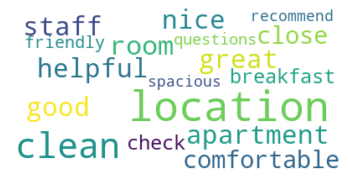

In [121]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()